In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
file_data = '/Users/cemalarican/Desktop/THESIS/PART 1/YEAR/'
file_main_data = '/Users/cemalarican/Desktop/THESIS/PART 1/YEAR/MAIN_DATA_YEAR/'

years = [2015, 2016, 2017, 2018]

# before the swap: stock1 actually equals stock2
coint_pairs = pd.read_csv('/Users/cemalarican/Desktop/THESIS/pairs_to_investigate.csv')

import sys  
sys.path.insert(0, '/Users/cemalarican/Desktop/THESIS/')

from pipeLine import Pipeline

In [2]:
data = pd.DataFrame()

# originally 239
for year in years:
    data['perf_' + str(year)] = pd.read_csv(file_data + 'pair_sim_' + str(year)+'.csv').iloc[-1]

data.drop('Unnamed: 0', inplace=True)

idx = list(data.index)

for year in years:
    d =  pd.read_csv(file_data + 'MAIN_DATA_YEAR/pair_sim_'+ str(year) +'.csv').groupby('symbol')
    alphas = []
    betas = []
    sharpes = []
    maxdraw = []
    for i in range(239):
        
        stock_alpha = d.get_group(idx[i]).alpha.iloc[-1]
        stock_beta = d.get_group(idx[i]).beta.iloc[-1]
        stock_sharpe = d.get_group(idx[i]).sharpe.iloc[-1]
        stock_maxdraw = d.get_group(idx[i]).max_drawdown.iloc[-1]
        alphas.append(stock_alpha)
        betas.append(stock_beta)
        sharpes.append(stock_sharpe)

    data['alpha_' + str(year)] = alphas
    data['beta_' + str(year)] = betas
    data['sharpe_' + str(year)] = sharpes

data


perf_2015    perf_2016    perf_2017    perf_2018  \
MZZ vs SMDD:NON-STAT    35060.9  5.89629e+06  5.24697e+06  6.96944e+06   
EDV vs UBT:NON-STAT     87996.6      79325.7      79737.5      78905.1   
IVV vs IWB:STAT         94921.7      91933.7      94723.7      90687.6   
DGL vs SGOL:STAT        98701.2      86556.1      80562.1      -236011   
PHDG vs VQT:STAT          97276      83578.8  2.42773e+06       907530   
IWV vs SCHB:NON-STAT     107718       108513       100458       101803   
IWB vs SPY:STAT         95974.5      90118.3      94956.4      95775.1   
IWB vs SSO:STAT          155385       164216       167933       145445   
CURE vs RXL:STAT        85262.4      83734.4      97984.7      99838.5   
EUSA vs VV:STAT          166674  1.53858e+06  5.42422e+06  5.47548e+06   
PHYS vs SGOL:NON-STAT   98922.3      98782.7      95530.7      85656.7   
FXP vs YANG:NON-STAT     171826       409892       118449 -3.47617e+07   
SCHB vs VTI:NON-STAT     106407       102082      87250.1      78138.7   
DGL vs GLD:STAT          104922      91390.1      75572.8      65581.4   
DLN vs VYM:NON-STAT     97753.5        85601        81161      78253.9   
FUTY vs XLU:NON-STAT    96545.7      92728.6      95179.5      96066.2   
FXY vs YCL:STAT         62387.3      -523347      -396422      -294746   
VPU vs XLU:NON-STAT     96284.5      99733.5      95241.4      93030.1   
GLD vs PHYS:STAT        94168.4      92729.9        90957      91242.8   
SCHG vs VOOG:STAT       98196.5      83197.8      70545.1      60988.3   
SCHB vs VONE:NON-STAT    100320      95737.6       102024       100481   
PGF vs PGX:STAT         99063.6      98863.6      97888.3      97538.8   
DOG vs DXD:STAT         73688.2        67524      63649.6      52901.9   
SBND vs TTT:STAT        73182.6      61552.7      91266.7      85871.6   
DNO vs DTO:NON-STAT      168803       163663 -1.73406e+06 -4.37094e+06   
ITOT vs VOO:STAT        93451.3       100625       108202       112833   
IWB vs SCHB:NON-STAT    99951.3      96979.7       102205      91342.2   
SSO vs VOO:STAT          129902       114382       108781       108147   
IWL vs MGC:STAT         96367.4      98500.8       102172       101838   
TBT vs TMV:NON-STAT     84641.7      76368.6      72168.7      69905.7   
...                         ...          ...          ...          ...   
EMES vs EMESQ:STAT       100000       100000       100000       100000   
EMES vs EMESZ:STAT       100000       100000       100000       100000   
PHIO vs RXII:STAT       44429.1      71693.2     -8048.09 -1.31664e+07   
PTIE vs SAVA:STAT        100000       100000       100000       100000   
RAS vs RASFD:STAT        100000       100000       100000       100000   
CBS vs VIAC:NON-STAT    99655.2      99269.1      98668.1      98212.9   
CHI_2 vs QQQC:STAT      88363.2      87015.1       142980        20080   
CUR vs SNCA:STAT         100000       100000        99664      99358.5   
CWEN vs NYLD:STAT        100546       101127       102026       108661   
EVLV vs IMBI:STAT        187198      65867.1       107047      72728.8   
IPCI vs IPCIF:STAT      99946.3      99903.1        99584      98929.5   
KEG vs KEGX:STAT        99853.4       113812       113833       113842   
KEG vs KEGXD:STAT       99853.4       113812       113833       113842   
MPVD vs MPVDF:STAT      82805.4     -10288.5      87707.4       173660   
PIPR vs PJC:STAT        99579.7        99168      99484.3      98962.2   
SDRL vs SDRL_:STAT      -651087       294768  1.65491e+07   1.3781e+08   
SPN vs SPNV:STAT         104522       175432       186456       178331   
SPN vs SPNVD:STAT        104522       175432       186456       178331   
TTS vs TTSH:STAT          98993      98857.3      97689.5      98309.1   
ANW vs ANWWQ:STAT        100000       100000       100000       100000   
ATCO vs SSW:STAT         100000       100000       100000       100000   
BAS vs BASX:STAT         100000       100000       100000       100000   
FEU vs SPEU:STAT        99

In [3]:
data['STAT'] = [list(data.index)[i].split(':')[1] for i in range(len(data)) ]

for year in years:
    data['pct_'+str(year)] = (data['perf_' +str(year)]/100000) -1
    
data

perf_2015    perf_2016    perf_2017    perf_2018  \
MZZ vs SMDD:NON-STAT    35060.9  5.89629e+06  5.24697e+06  6.96944e+06   
EDV vs UBT:NON-STAT     87996.6      79325.7      79737.5      78905.1   
IVV vs IWB:STAT         94921.7      91933.7      94723.7      90687.6   
DGL vs SGOL:STAT        98701.2      86556.1      80562.1      -236011   
PHDG vs VQT:STAT          97276      83578.8  2.42773e+06       907530   
IWV vs SCHB:NON-STAT     107718       108513       100458       101803   
IWB vs SPY:STAT         95974.5      90118.3      94956.4      95775.1   
IWB vs SSO:STAT          155385       164216       167933       145445   
CURE vs RXL:STAT        85262.4      83734.4      97984.7      99838.5   
EUSA vs VV:STAT          166674  1.53858e+06  5.42422e+06  5.47548e+06   
PHYS vs SGOL:NON-STAT   98922.3      98782.7      95530.7      85656.7   
FXP vs YANG:NON-STAT     171826       409892       118449 -3.47617e+07   
SCHB vs VTI:NON-STAT     106407       102082      87250.1      78138.7   
DGL vs GLD:STAT          104922      91390.1      75572.8      65581.4   
DLN vs VYM:NON-STAT     97753.5        85601        81161      78253.9   
FUTY vs XLU:NON-STAT    96545.7      92728.6      95179.5      96066.2   
FXY vs YCL:STAT         62387.3      -523347      -396422      -294746   
VPU vs XLU:NON-STAT     96284.5      99733.5      95241.4      93030.1   
GLD vs PHYS:STAT        94168.4      92729.9        90957      91242.8   
SCHG vs VOOG:STAT       98196.5      83197.8      70545.1      60988.3   
SCHB vs VONE:NON-STAT    100320      95737.6       102024       100481   
PGF vs PGX:STAT         99063.6      98863.6      97888.3      97538.8   
DOG vs DXD:STAT         73688.2        67524      63649.6      52901.9   
SBND vs TTT:STAT        73182.6      61552.7      91266.7      85871.6   
DNO vs DTO:NON-STAT      168803       163663 -1.73406e+06 -4.37094e+06   
ITOT vs VOO:STAT        93451.3       100625       108202       112833   
IWB vs SCHB:NON-STAT    99951.3      96979.7       102205      91342.2   
SSO vs VOO:STAT          129902       114382       108781       108147   
IWL vs MGC:STAT         96367.4      98500.8       102172       101838   
TBT vs TMV:NON-STAT     84641.7      76368.6      72168.7      69905.7   
...                         ...          ...          ...          ...   
EMES vs EMESQ:STAT       100000       100000       100000       100000   
EMES vs EMESZ:STAT       100000       100000       100000       100000   
PHIO vs RXII:STAT       44429.1      71693.2     -8048.09 -1.31664e+07   
PTIE vs SAVA:STAT        100000       100000       100000       100000   
RAS vs RASFD:STAT        100000       100000       100000       100000   
CBS vs VIAC:NON-STAT    99655.2      99269.1      98668.1      98212.9   
CHI_2 vs QQQC:STAT      88363.2      87015.1       142980        20080   
CUR vs SNCA:STAT         100000       100000        99664      99358.5   
CWEN vs NYLD:STAT        100546       101127       102026       108661   
EVLV vs IMBI:STAT        187198      65867.1       107047      72728.8   
IPCI vs IPCIF:STAT      99946.3      99903.1        99584      98929.5   
KEG vs KEGX:STAT        99853.4       113812       113833       113842   
KEG vs KEGXD:STAT       99853.4       113812       113833       113842   
MPVD vs MPVDF:STAT      82805.4     -10288.5      87707.4       173660   
PIPR vs PJC:STAT        99579.7        99168      99484.3      98962.2   
SDRL vs SDRL_:STAT      -651087       294768  1.65491e+07   1.3781e+08   
SPN vs SPNV:STAT         104522       175432       186456       178331   
SPN vs SPNVD:STAT        104522       175432       186456       178331   
TTS vs TTSH:STAT          98993      98857.3      97689.5      98309.1   
ANW vs ANWWQ:STAT        100000       100000       100000       100000   
ATCO vs SSW:STAT         100000       100000       100000       100000   
BAS vs BASX:STAT         100000       100000       100000       100000   
FEU vs SPEU:STAT        99

In [4]:
pnl_data_15 = pd.DataFrame()
pnl_data_16 = pd.DataFrame()
pnl_data_17 = pd.DataFrame()
pnl_data_18 = pd.DataFrame()
tickers = list(data.index)

def get_pnl(year, dbase, year_base):
    d = pd.read_csv(file_main_data + 'pair_sim_' + str(year) + '.csv')
    dg = d.groupby('symbol')
    tickers = list(data.index)
    for i in range(len(dbase)):
        year_base[tickers[i]] = dg.get_group(tickers[i]).pnl.reset_index(drop=True)
    return year_base

def get_pnl_list(pnl_data, yr):
    list_of_pnl = []
    for i in range(len(coint_pairs)):
        tick = pd.DataFrame()
        tick['data'] = pnl_data[tickers[i]]
        tick['pos'] = pnl_data[tickers[i]] > 0

        t = tick.groupby('pos').get_group(False)
        try:
            tt = tick.groupby('pos').get_group(True)
        except KeyError:
            pass

        t_len = len(t)
        tt_len = len(tt)

        t_mean = t['data'].mean()
        tt_mean = tt['data'].mean()

        whole_avg = pnl_data[tickers[i]].mean()

        r = (tickers[i], t_len, tt_len, t_mean, tt_mean, whole_avg, data['perf_'+str(yr)].iloc[i])
        list_of_pnl.append(r)

    return list_of_pnl        


def make_df_pnl(pnl_list, yr):
    df = pd.DataFrame(data=pnl_list, columns=['pair', 'no_loss', 'no_win', 'avg_loss', 'avg_win', 'whole_avg', 'perf_'+str(yr)])
    df.set_index('pair', inplace=True)
    s = list(df.index)
    df['stat'] = [s[i].split(':')[1] for i in range(len(s))]
    df['pos_avg'] = df.whole_avg > 0
    df['win'] = df['perf_'+ str(yr)] > 100000
    tot_days = df['no_loss'] + df['no_win']
    df['loss_percent'] = round(df['no_loss']/tot_days, 2)
    df['win_percent'] = round(df['no_win']/tot_days, 2)
    
    
    return df[df['perf_'+str(yr)] != 100000]


pnl_15 = get_pnl(2015, data, pnl_data_15)
pnl_16 = get_pnl(2016, data, pnl_data_16)
pnl_17 = get_pnl(2017, data, pnl_data_17)
pnl_18 = get_pnl(2018, data, pnl_data_18)

list_15 = get_pnl_list(pnl_15, 2015)
list_16 = get_pnl_list(pnl_16, 2016)
list_17 = get_pnl_list(pnl_17, 2017)
list_18 = get_pnl_list(pnl_18, 2018)

df_15 = make_df_pnl(list_15, 2015)
df_16 = make_df_pnl(list_16, 2016)
df_17 = make_df_pnl(list_17, 2017)
df_18 = make_df_pnl(list_18, 2018)

def get_tables(data, year):
    
    cols = ['no_loss', 'no_win', 'avg_loss','avg_win', 'whole_avg', 'perf_' + str(year), 'loss_percent', 'win_percent']
    
    avg_list = [list(round(data[cols].mean(), 2).reset_index(drop=True))[i] for i in range(8)]
    
    stat_list = list(round(data.groupby('stat').get_group('STAT')[cols].mean(), 2))
    
    nstat_list = list(round(data.groupby('stat').get_group('NON-STAT')[cols].mean(), 2))
    
    stat = data.groupby('stat').get_group('STAT')
    
    win_stat = list(round(stat.groupby('win').get_group(True)[cols].mean(), 2))
    
    nstat = data.groupby('stat').get_group('NON-STAT')
    
    win_nstat = list(round(nstat.groupby('win').get_group(True)[cols].mean(), 2))
    
    df_list = [avg_list, stat_list, nstat_list, win_stat, win_nstat]
    
    index = ['avg', 'avg stat', 'avg non-stat', 'avg winning stat', 'avg winning non-stat']
    
    list_to_df =  pd.DataFrame(data=df_list, columns=cols, index=index)
    list_to_df.to_latex(buf=file_data + str(year)+' daily returns.txt', index=True)
    print(list_to_df)
    

get_tables(df_18, 2018)
get_tables(df_17, 2017)
get_tables(df_16, 2016)
get_tables(df_15, 2015)

                      no_loss  no_win  avg_loss   avg_win  whole_avg  \
avg                    629.25  376.75 -22737.44  24901.70    -199.62   
avg stat               634.37  371.63 -21188.03  22608.83      42.45   
avg non-stat           618.02  387.98 -26141.06  29938.51    -731.38   
avg winning stat       602.12  403.88 -30786.27  38347.33    3986.62   
avg winning non-stat   551.06  454.94 -24618.03  28141.09     773.83   

                       perf_2018  loss_percent  win_percent  
avg                   -100818.66          0.63         0.37  
avg stat               142704.92          0.63         0.37  
avg non-stat          -635772.12          0.61         0.39  
avg winning stat      4110539.07          0.60         0.40  
avg winning non-stat   878475.74          0.55         0.45  
                      no_loss  no_win  avg_loss   avg_win  whole_avg  \
avg                    472.13  284.53  -7595.03   8677.84     152.49   
avg stat               475.97  281.44  -9185.56  10

In [5]:
data = data[data['perf_2018'] != 100000]
data

perf_2015    perf_2016    perf_2017    perf_2018  \
MZZ vs SMDD:NON-STAT       35060.9  5.89629e+06  5.24697e+06  6.96944e+06   
EDV vs UBT:NON-STAT        87996.6      79325.7      79737.5      78905.1   
IVV vs IWB:STAT            94921.7      91933.7      94723.7      90687.6   
DGL vs SGOL:STAT           98701.2      86556.1      80562.1      -236011   
PHDG vs VQT:STAT             97276      83578.8  2.42773e+06       907530   
IWV vs SCHB:NON-STAT        107718       108513       100458       101803   
IWB vs SPY:STAT            95974.5      90118.3      94956.4      95775.1   
IWB vs SSO:STAT             155385       164216       167933       145445   
CURE vs RXL:STAT           85262.4      83734.4      97984.7      99838.5   
EUSA vs VV:STAT             166674  1.53858e+06  5.42422e+06  5.47548e+06   
PHYS vs SGOL:NON-STAT      98922.3      98782.7      95530.7      85656.7   
FXP vs YANG:NON-STAT        171826       409892       118449 -3.47617e+07   
SCHB vs VTI:NON-STAT        106407       102082      87250.1      78138.7   
DGL vs GLD:STAT             104922      91390.1      75572.8      65581.4   
DLN vs VYM:NON-STAT        97753.5        85601        81161      78253.9   
FUTY vs XLU:NON-STAT       96545.7      92728.6      95179.5      96066.2   
FXY vs YCL:STAT            62387.3      -523347      -396422      -294746   
VPU vs XLU:NON-STAT        96284.5      99733.5      95241.4      93030.1   
GLD vs PHYS:STAT           94168.4      92729.9        90957      91242.8   
SCHG vs VOOG:STAT          98196.5      83197.8      70545.1      60988.3   
SCHB vs VONE:NON-STAT       100320      95737.6       102024       100481   
PGF vs PGX:STAT            99063.6      98863.6      97888.3      97538.8   
DOG vs DXD:STAT            73688.2        67524      63649.6      52901.9   
SBND vs TTT:STAT           73182.6      61552.7      91266.7      85871.6   
DNO vs DTO:NON-STAT         168803       163663 -1.73406e+06 -4.37094e+06   
ITOT vs VOO:STAT           93451.3       100625       108202       112833   
IWB vs SCHB:NON-STAT       99951.3      96979.7       102205      91342.2   
SSO vs VOO:STAT             129902       114382       108781       108147   
IWL vs MGC:STAT            96367.4      98500.8       102172       101838   
TBT vs TMV:NON-STAT        84641.7      76368.6      72168.7      69905.7   
...                            ...          ...          ...          ...   
NLOK vs SYMC:STAT            96069      98215.1       103183      95015.8   
VISL vs XGTI:STAT     -2.66386e+06 -2.71959e+06 -2.78961e+06 -2.80063e+06   
DBI vs DSW:NON-STAT        99689.7      99574.8      99461.3       100335   
PXLG vs SPGP:STAT          99721.2      99114.2       241811       245629   
VCO vs VCOYY:STAT          96235.9      89976.7      85753.9      78961.1   
NVLN vs NVLNF:STAT          100000      90248.8      64344.5      8924.81   
OXSQ vs TICC:STAT          88070.6      78116.2      75525.2      66847.8   
AUO vs AUOTY:STAT          95848.4      95330.5      92858.7      85835.3   
BBDC vs TCAP:STAT          96535.8      95014.9      89357.3      70539.4   
PHIO vs RXII:STAT          44429.1      71693.2     -8048.09 -1.31664e+07   
CBS vs VIAC:NON-STAT       99655.2      99269.1      98668.1      98212.9   
CHI_2 vs QQQC:STAT         88363.2      87015.1       142980        20080   
CUR vs SNCA:STAT            100000       100000        99664      99358.5   
CWEN vs NYLD:STAT           100546       101127       102026       108661   
EVLV vs IMBI:STAT           187198      65867.1       107047      72728.8   
IPCI vs IPCIF:STAT         99946.3      99903.1        99584      98929.5   
KEG vs KEGX:STAT           99853.4       113812       113833       113842   
KEG vs KEGXD:STAT          99853.4       113812       113833       113842   
MPVD vs MPVDF:STAT         82805.4     -10288.5      87707.4       173660   
PIPR vs PJC:STAT           99579.7        99168      99484.3      98962.2   
SDRL vs SDRL_:STAT   

In [6]:
for year in years:
    
    def get_beta(year, dbase):
        d = pd.read_csv(file_main_data + 'pair_sim_' + str(year) + '.csv')
        dg = d.groupby('symbol')
        betas = []
        tickers = list(dbase.index)
        for i in range(len(dbase)):
            betas.append(dg.get_group(tickers[i]).beta.iloc[-1])

        return betas
    
    def get_alpha(year, dbase):
        d = pd.read_csv(file_main_data + 'pair_sim_' + str(year) + '.csv')
        dg = d.groupby('symbol')
        alphas = []
        tickers = list(dbase.index)
        for i in range(len(dbase)):
            alphas.append(dg.get_group(tickers[i]).alpha.iloc[-1])

        return alphas
    
    def get_sharpe(year, dbase):
        d = pd.read_csv(file_main_data + 'pair_sim_' + str(year) + '.csv')
        dg = d.groupby('symbol')
        sharpes = []
        tickers = list(dbase.index)
        for i in range(len(dbase)):
            sharpes.append(dg.get_group(tickers[i]).sharpe.iloc[-1])

        return sharpes
    
    def get_maxdraw(year, dbase):
        d = pd.read_csv(file_main_data + 'pair_sim_' + str(year) + '.csv')
        dg = d.groupby('symbol')
        maxes = []
        tickers = list(dbase.index)
        for i in range(len(dbase)):
            maxes.append(dg.get_group(tickers[i]).max_drawdown.iloc[-1])
        return maxes

    data['beta_'+str(year)] = get_beta(year, data)
    data['alpha_'+str(year)] = get_alpha(year, data)
    data['sharpe_'+str(year)] = get_sharpe(year, data)
    data['maxdraw_'+str(year)] = get_maxdraw(year, data)


/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/ipykernel/__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/ipykernel/__main__.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/anaconda3/envs/zipline/lib/python3.5/site-packages/ipykernel/__main__.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [7]:
data_group = data.groupby('STAT')
stat_data = data_group.get_group('STAT')
nstat_data = data_group.get_group('NON-STAT')
print('number of stat pairs: {}'.format(len(stat_data)))
print('number of non stat pairs: {}'.format(len(nstat_data)))

number of stat pairs: 139
number of non stat pairs: 62


In [8]:
### GETTING AVERAGE RESULTS ###
average_perf = OrderedDict()
pct_mean = OrderedDict()
pct_std = OrderedDict()
alpha_mean = OrderedDict()
beta_mean = OrderedDict()
sharpe_mean = OrderedDict()
maxdraw_mean = OrderedDict()

best_20_perf = OrderedDict()
worst_20_perf = OrderedDict()

best_20_alpha = OrderedDict()
worst_20_alpha = OrderedDict()

data_len = len(data)

for year in years:
    average_perf[year] = round(data['perf_' + str(year)].mean(), 2)
    pct_mean[year] = round(data['pct_' + str(year)].mean(), 2)
    pct_std[year] = round(data['pct_'+str(year)].std(), 2)
    alpha_mean[year] = round(data['alpha_' + str(year)].mean(), 2)
    beta_mean[year] = round(data['beta_' + str(year)].mean(), 2)
    sharpe_mean[year] = round(data['sharpe_' + str(year)].mean(), 2)
    maxdraw_mean[year] = round(data['maxdraw_'+ str(year)].mean(), 2)
    
    d = pd.read_csv(file_data + '/pair_sim_' + str(year)+'.csv')
    best_idx = [data['perf_'+str(year)].sort_values()[data_len-20:data_len].index[i] for i in range(20)]
    worst_idx = [data['perf_'+str(year)].sort_values()[:20].index[i] for i in range(20)]
    
    best_20_perf[year] = [(best_idx[i], d[best_idx[i]]) for i in range(len(best_idx))]
    worst_20_perf[year] = [(worst_idx[i], d[worst_idx[i]]) for i in range(len(worst_idx))]
    
colnames = ['average portfolio value', 'average percentage change', 'average standard deviation',
            'average alpha', 'average beta', 'average sharpe ratio', 'average max drawdown']

list_of_dicts = [average_perf, pct_mean, pct_std,
                 alpha_mean, beta_mean, sharpe_mean, maxdraw_mean]

main_df = pd.DataFrame()
main_df['year'] = pd.Series(years)

for i in range(len(list_of_dicts)):
    df = pd.DataFrame(data=list(list_of_dicts[i].items()) , columns=['year', colnames[i]] )
    main_df = pd.concat([main_df, df[colnames[i]]], axis=1)

main_df.to_latex(buf=file_data+'average-perf.txt', index=False)
print(main_df)


   year  average portfolio value  average percentage change  \
0  2015                 57963.27                      -0.42   
1  2016                 91027.78                      -0.09   
2  2017                210866.04                       1.11   
3  2018                -96563.21                      -1.97   

   average standard deviation  average alpha  average beta  \
0                        3.44           0.81          0.32   
1                       11.65           0.02          1.10   
2                       22.47         -19.39          2.33   
3                      121.07         -14.20          1.34   

   average sharpe ratio  average max drawdown  
0                 -1.37                 -0.29  
1                 -1.30                 -0.62  
2                 -1.32                 -0.85  
3                 -1.23                 -1.29  


OrderedDict([(2015, [('SDS vs SH:NON-STAT', 0      100000.000000
                1       99945.457589
                2       98135.361068
                3      100470.460517
                4      103765.953091
                5      101734.868155
                6      100941.996679
                7      100591.031637
                8       99331.278141
                9       96640.168028
                10      98852.761977
                11      98859.694912
                12      99909.957651
                13     100092.471112
                14      99683.954623
                15     100585.982690
                16      99181.726059
                17      96659.954753
                18      99237.452324
                19      96897.125026
                20      98492.566655
                21     101946.179575
                22     101236.001932
                23     103603.946037
                24     102454.421509
                25     101779.495910
          

139


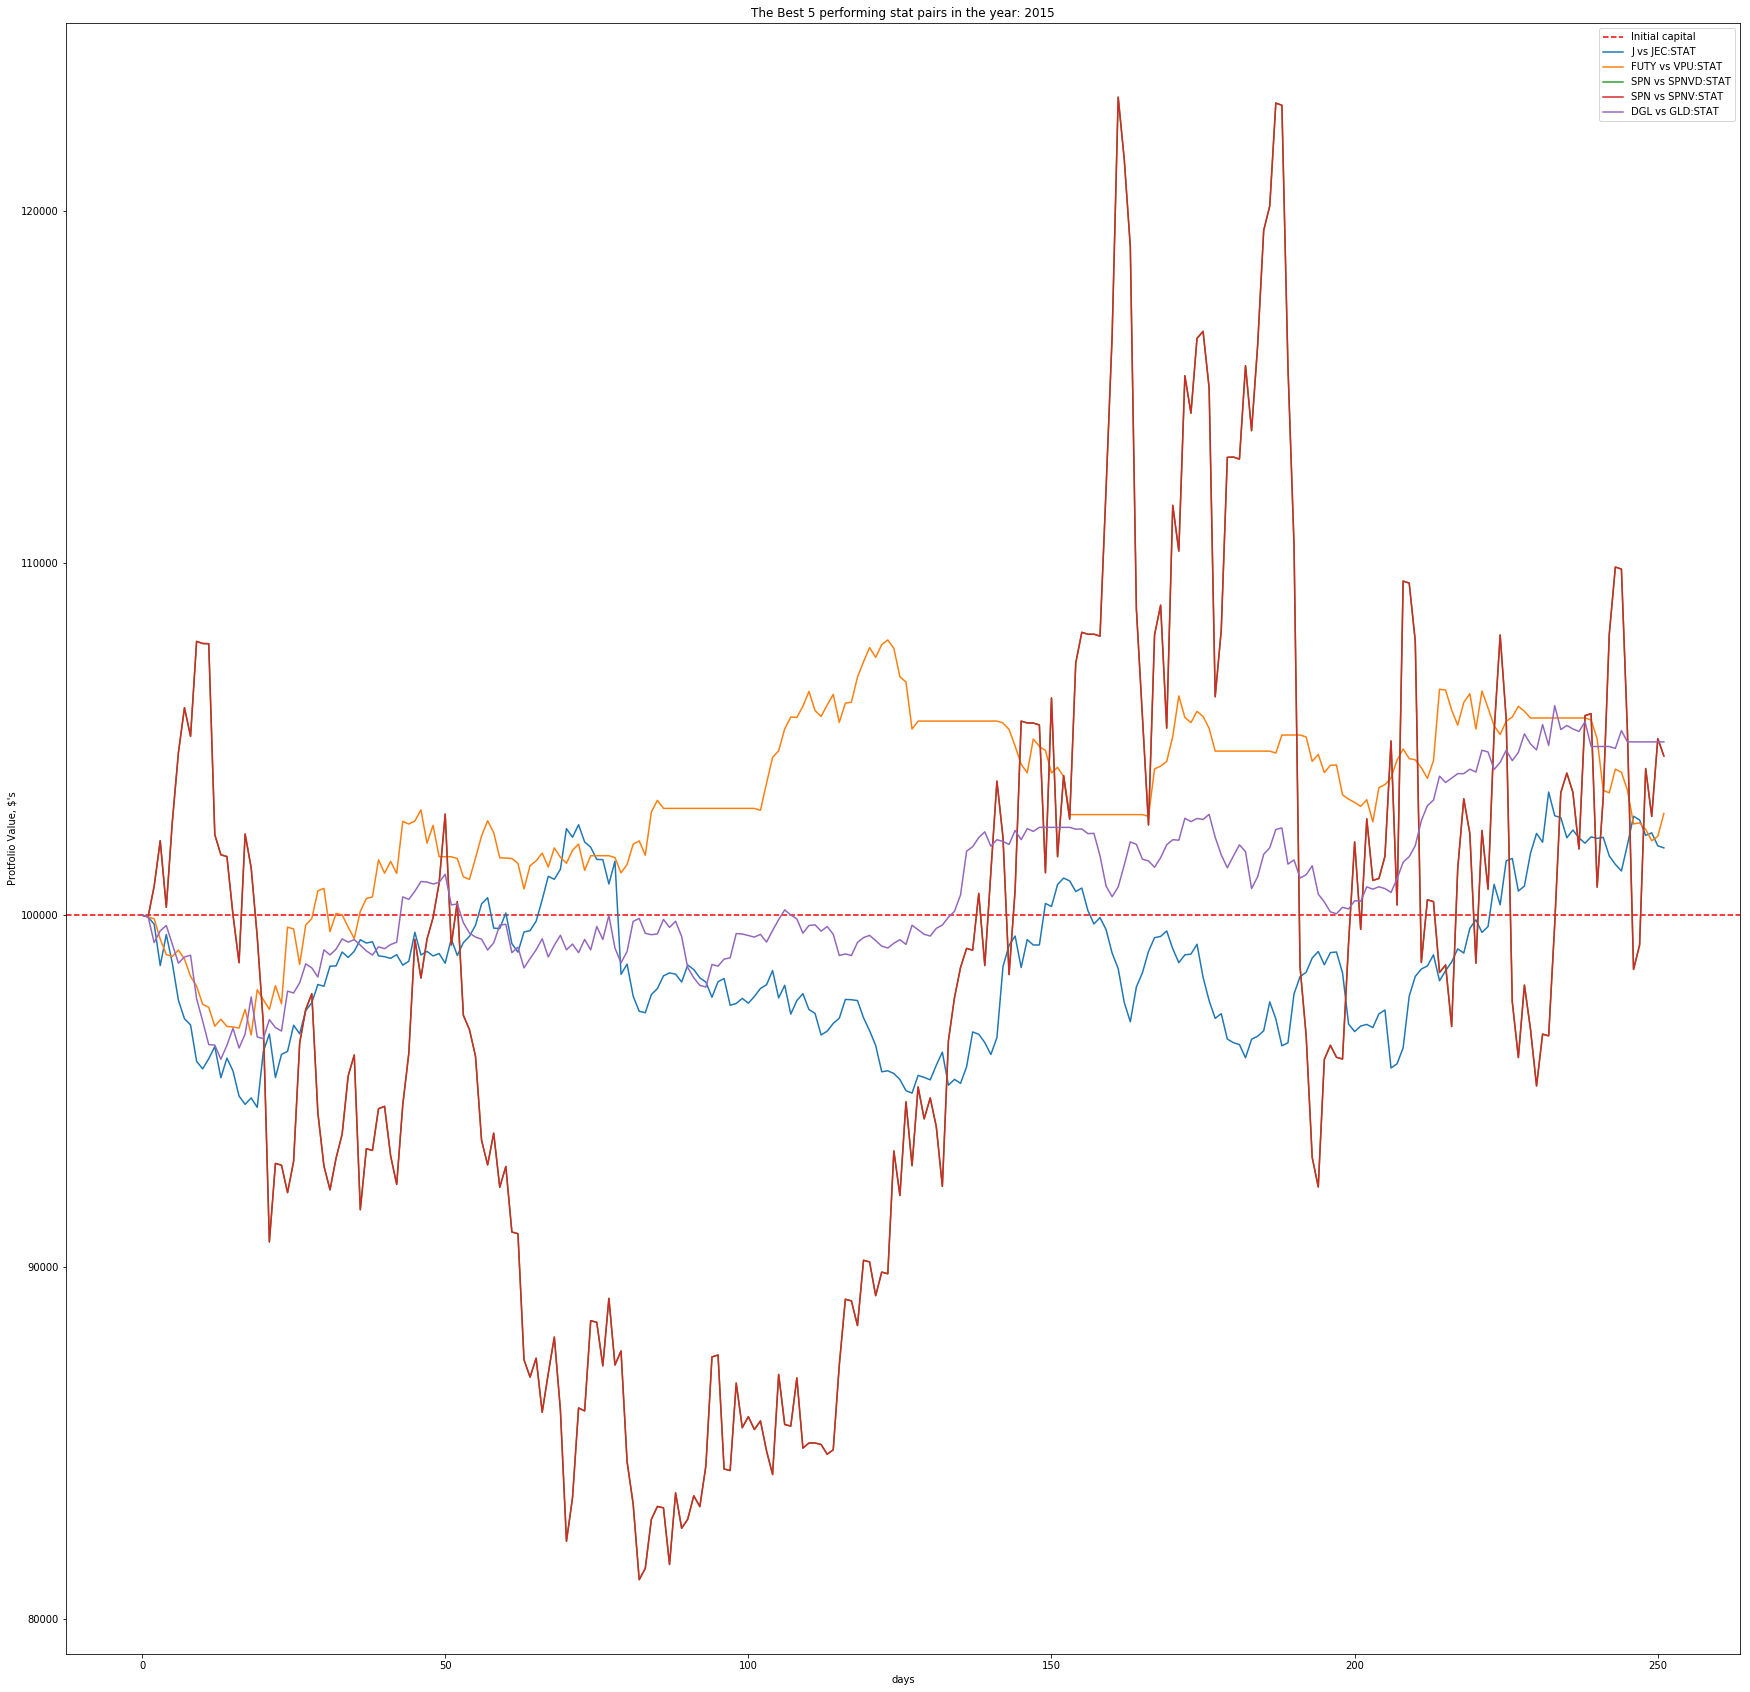

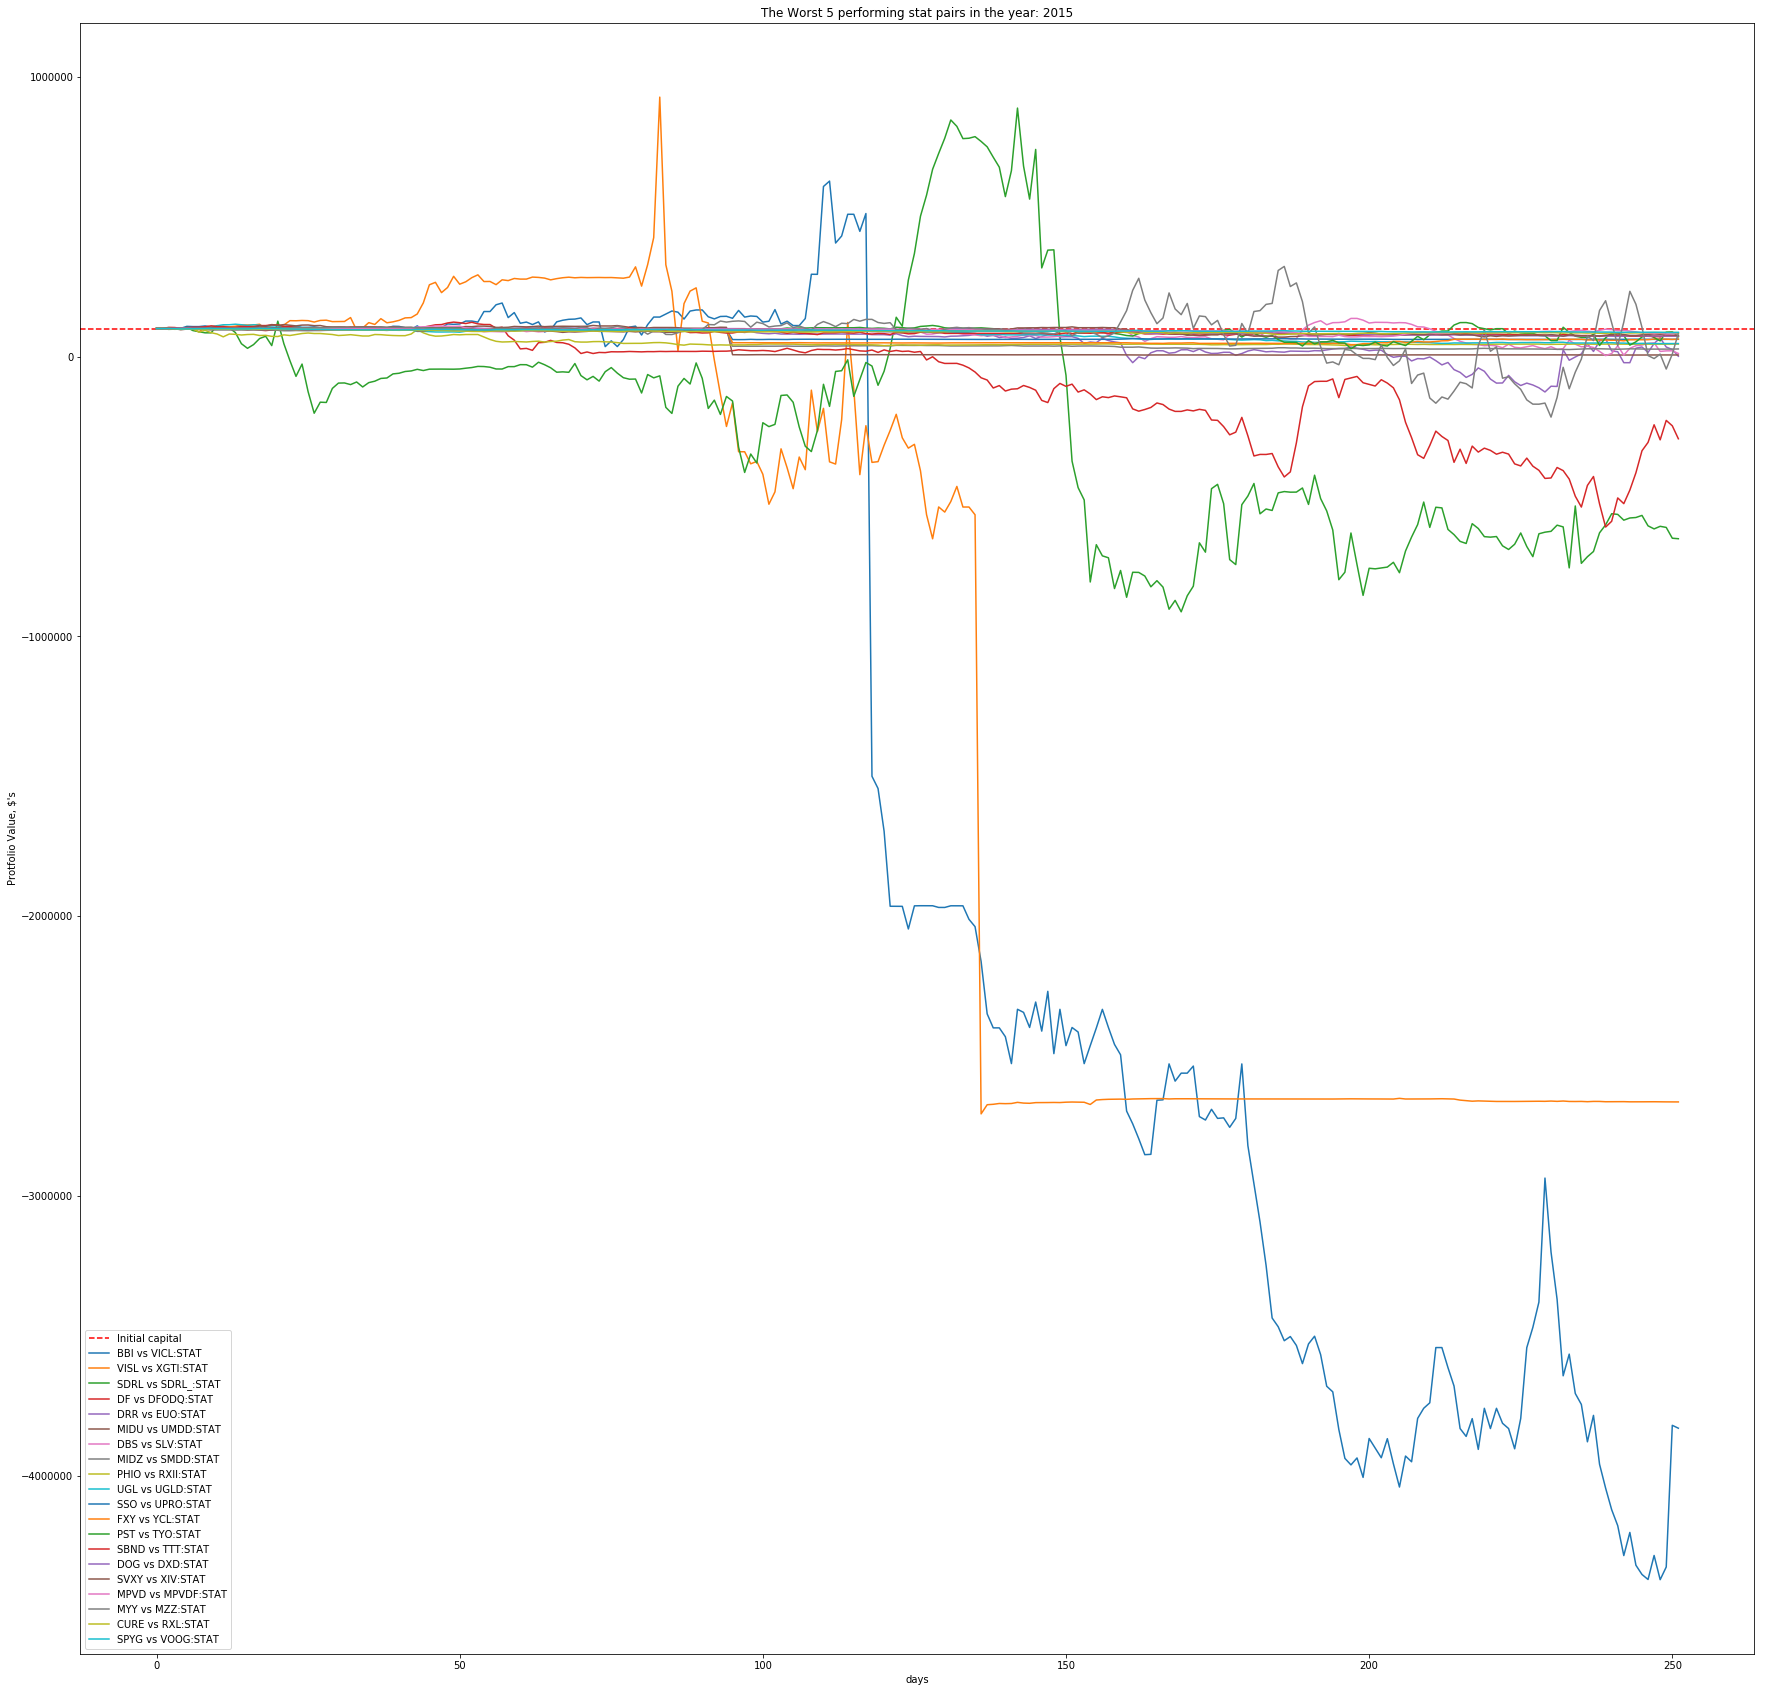

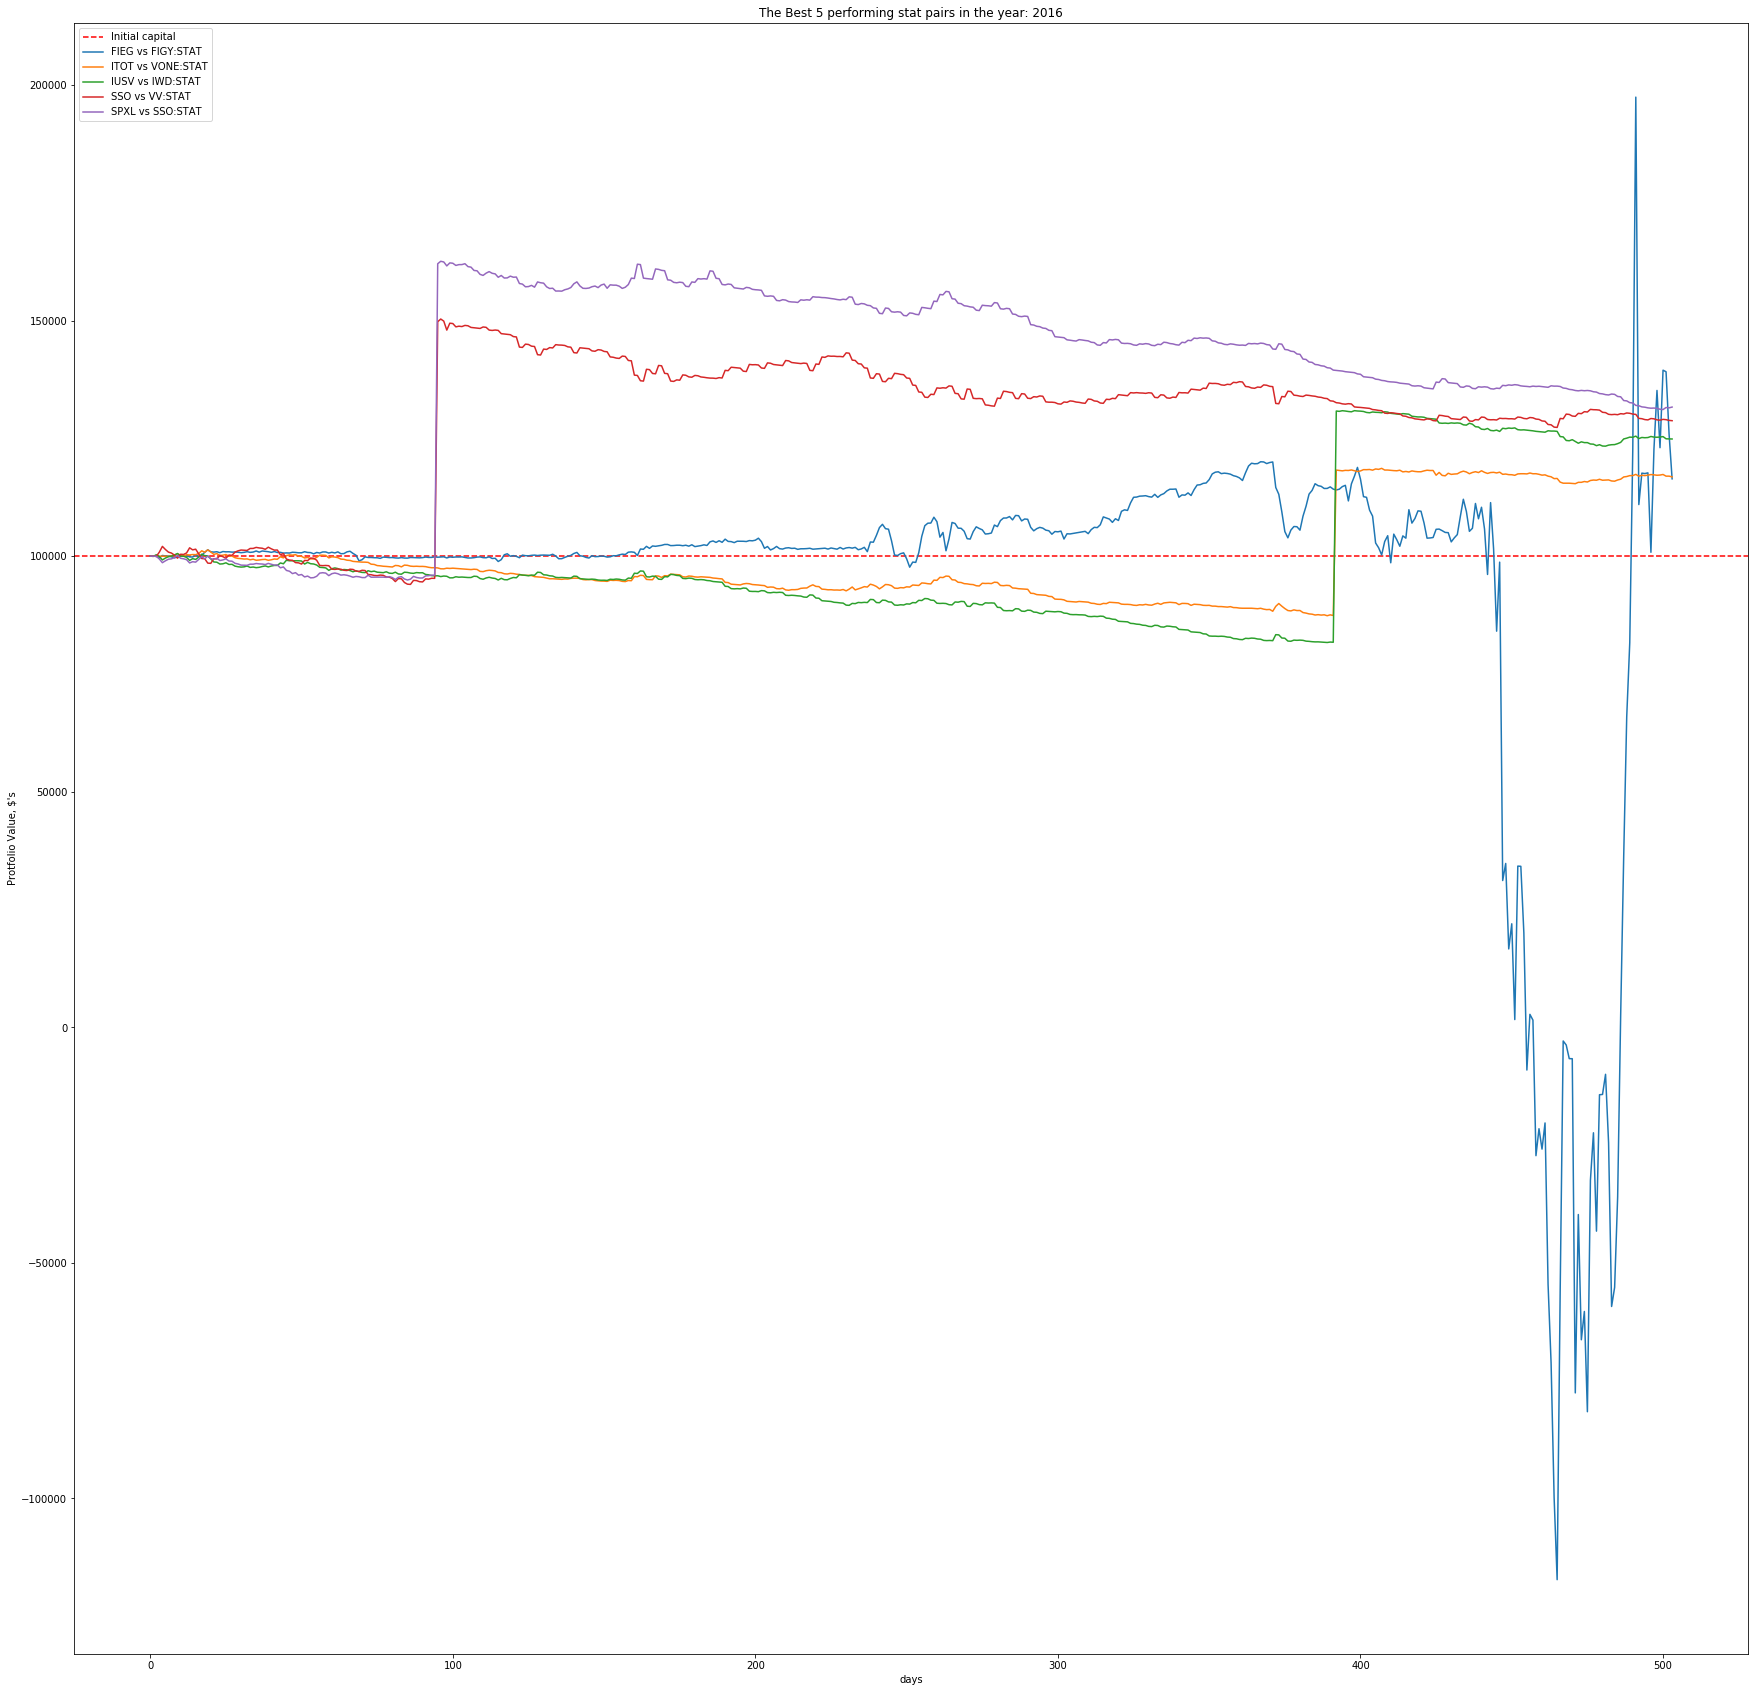

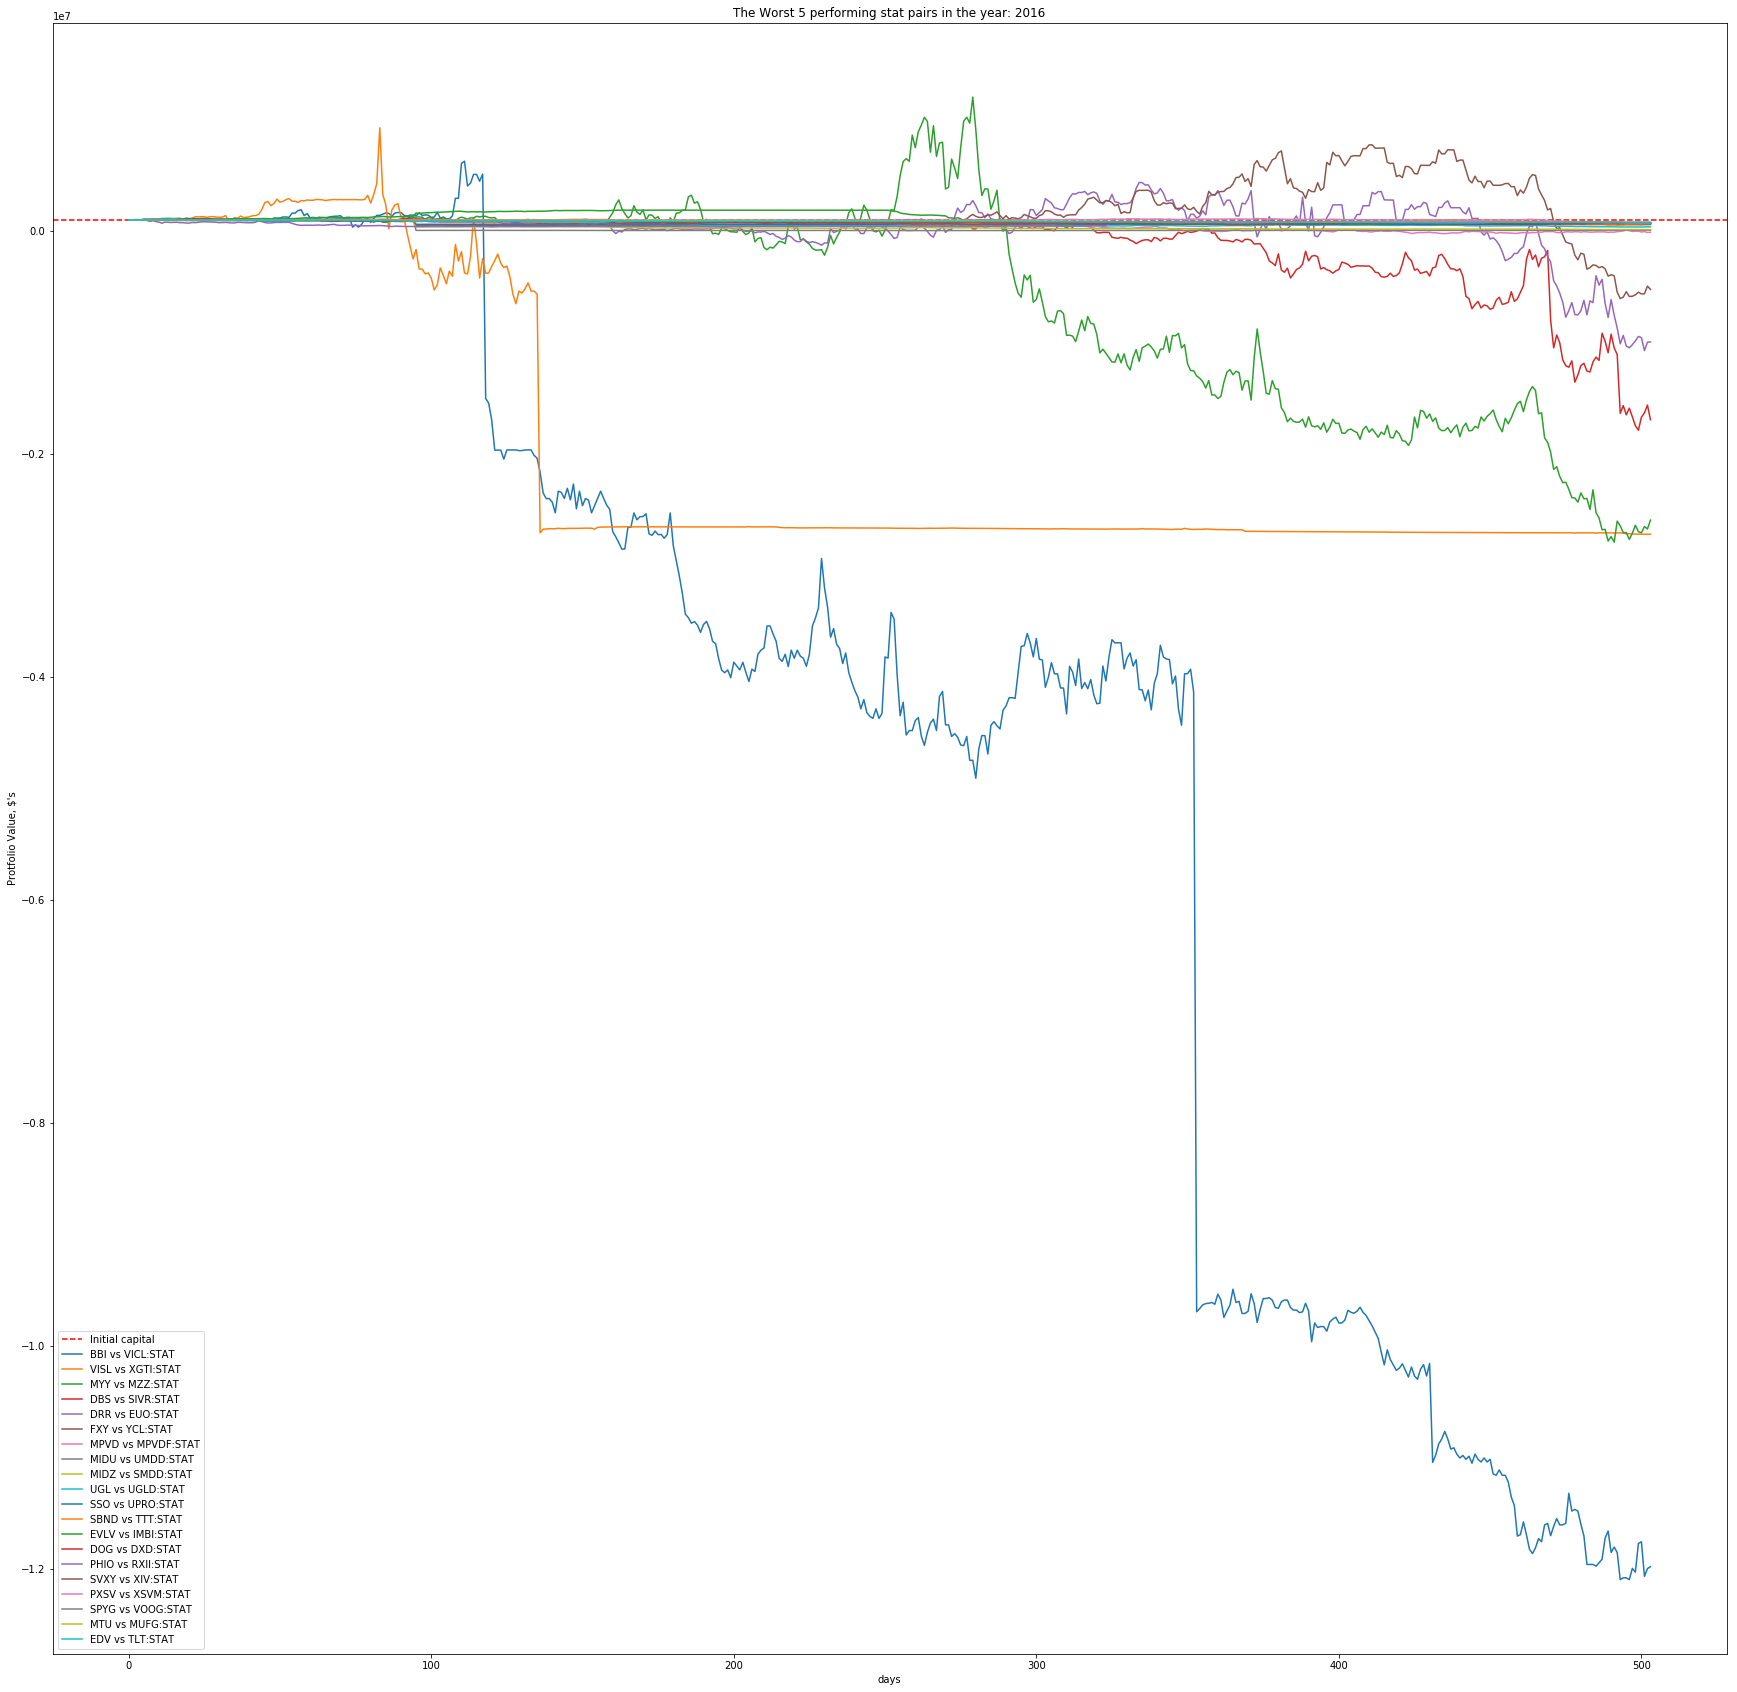

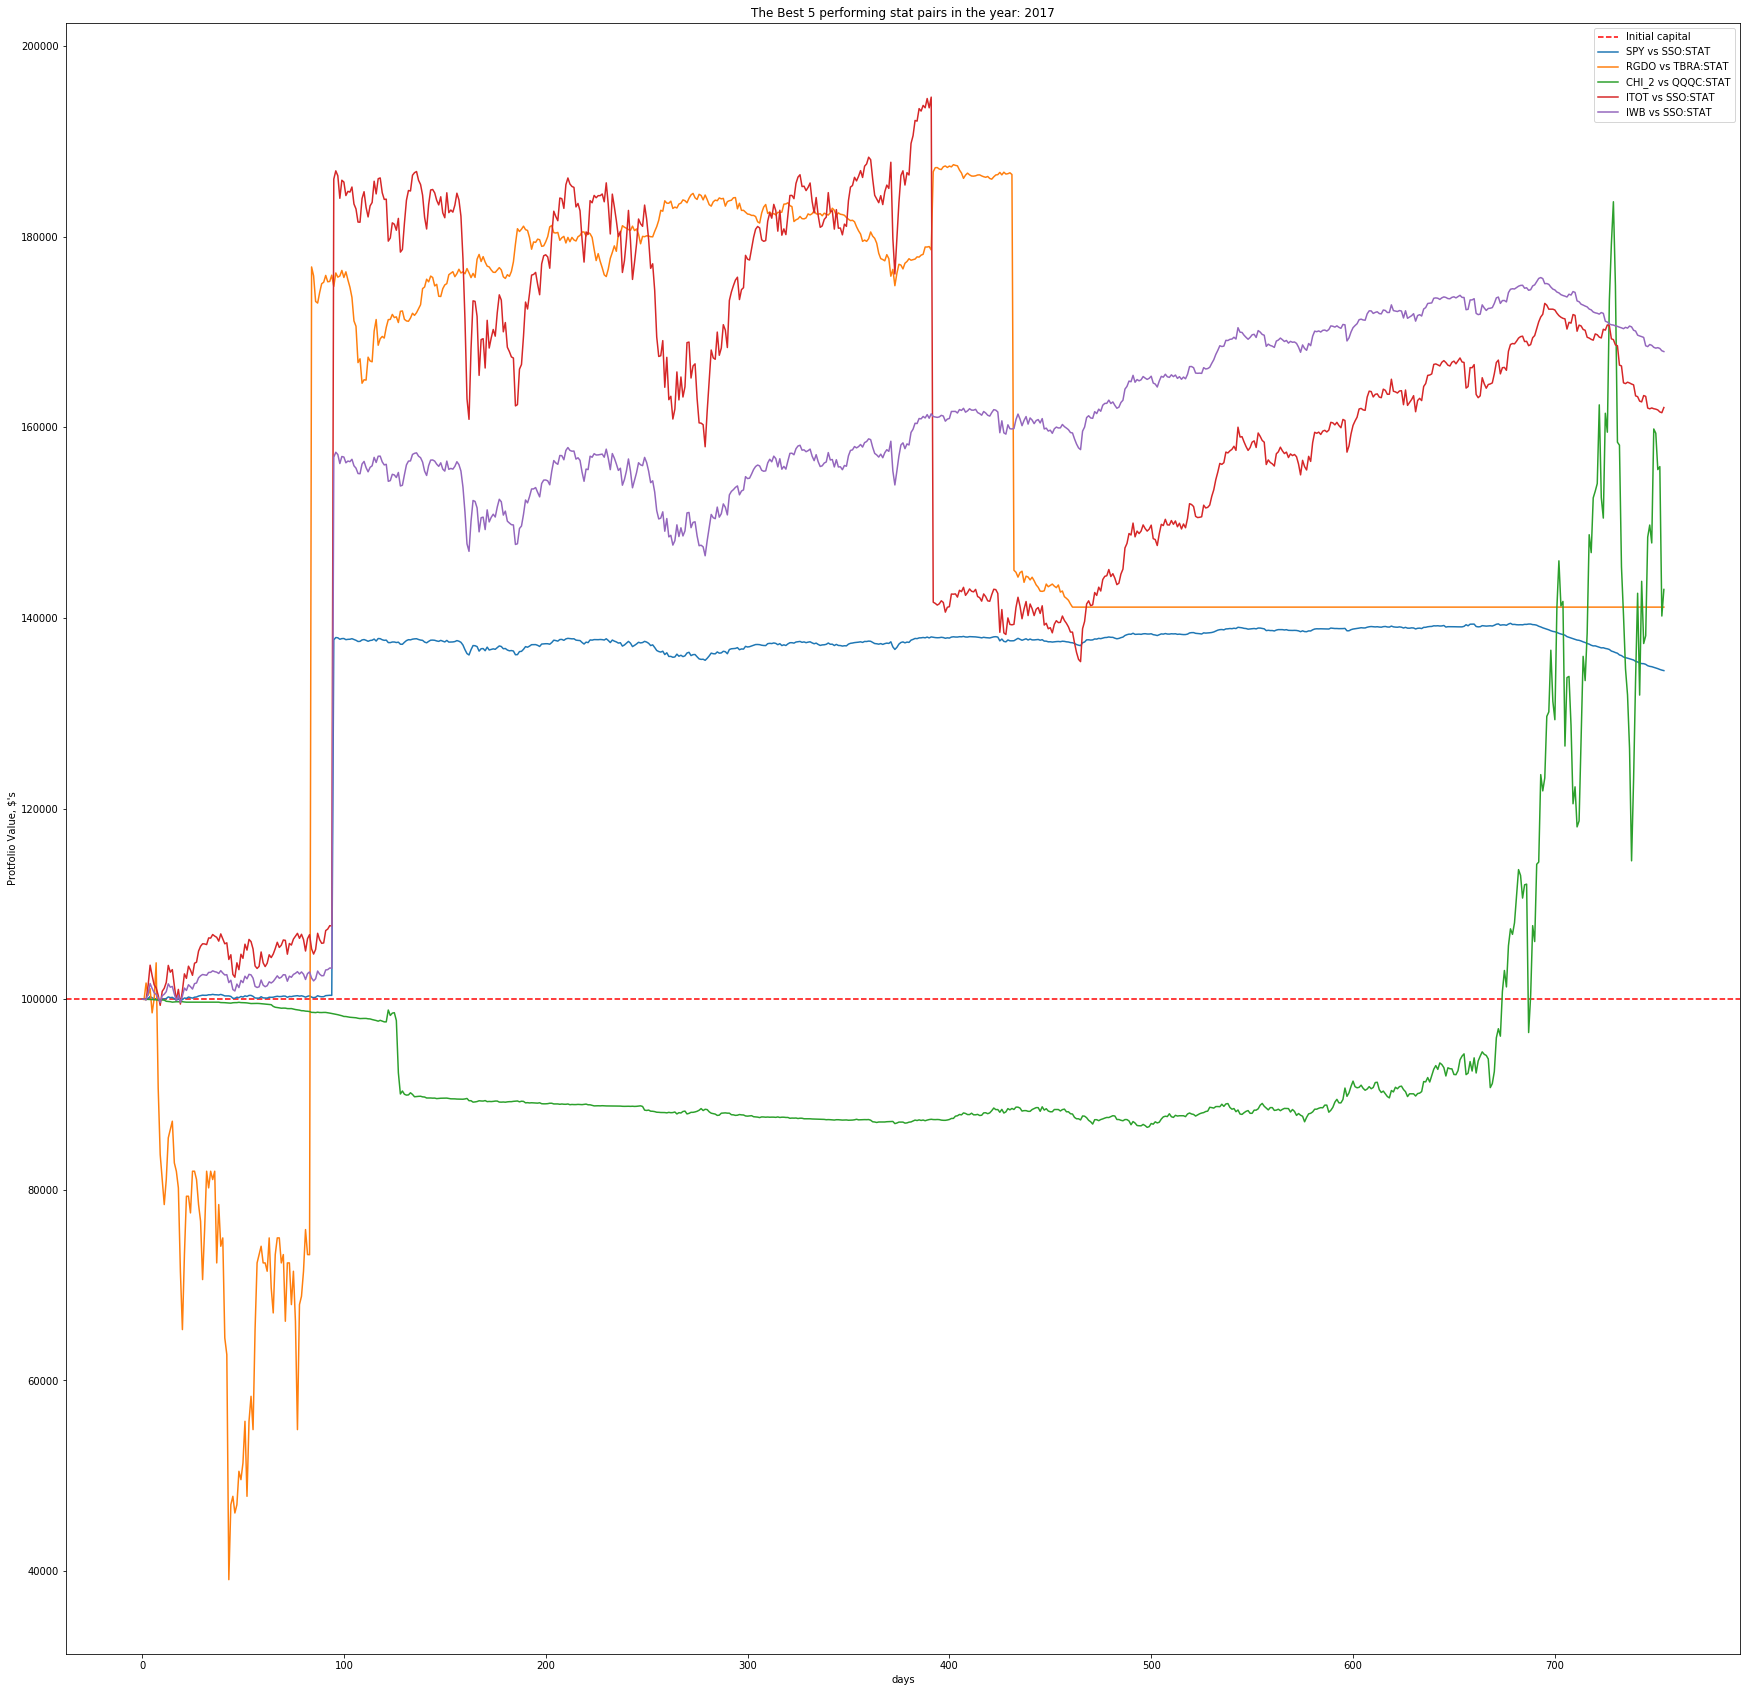

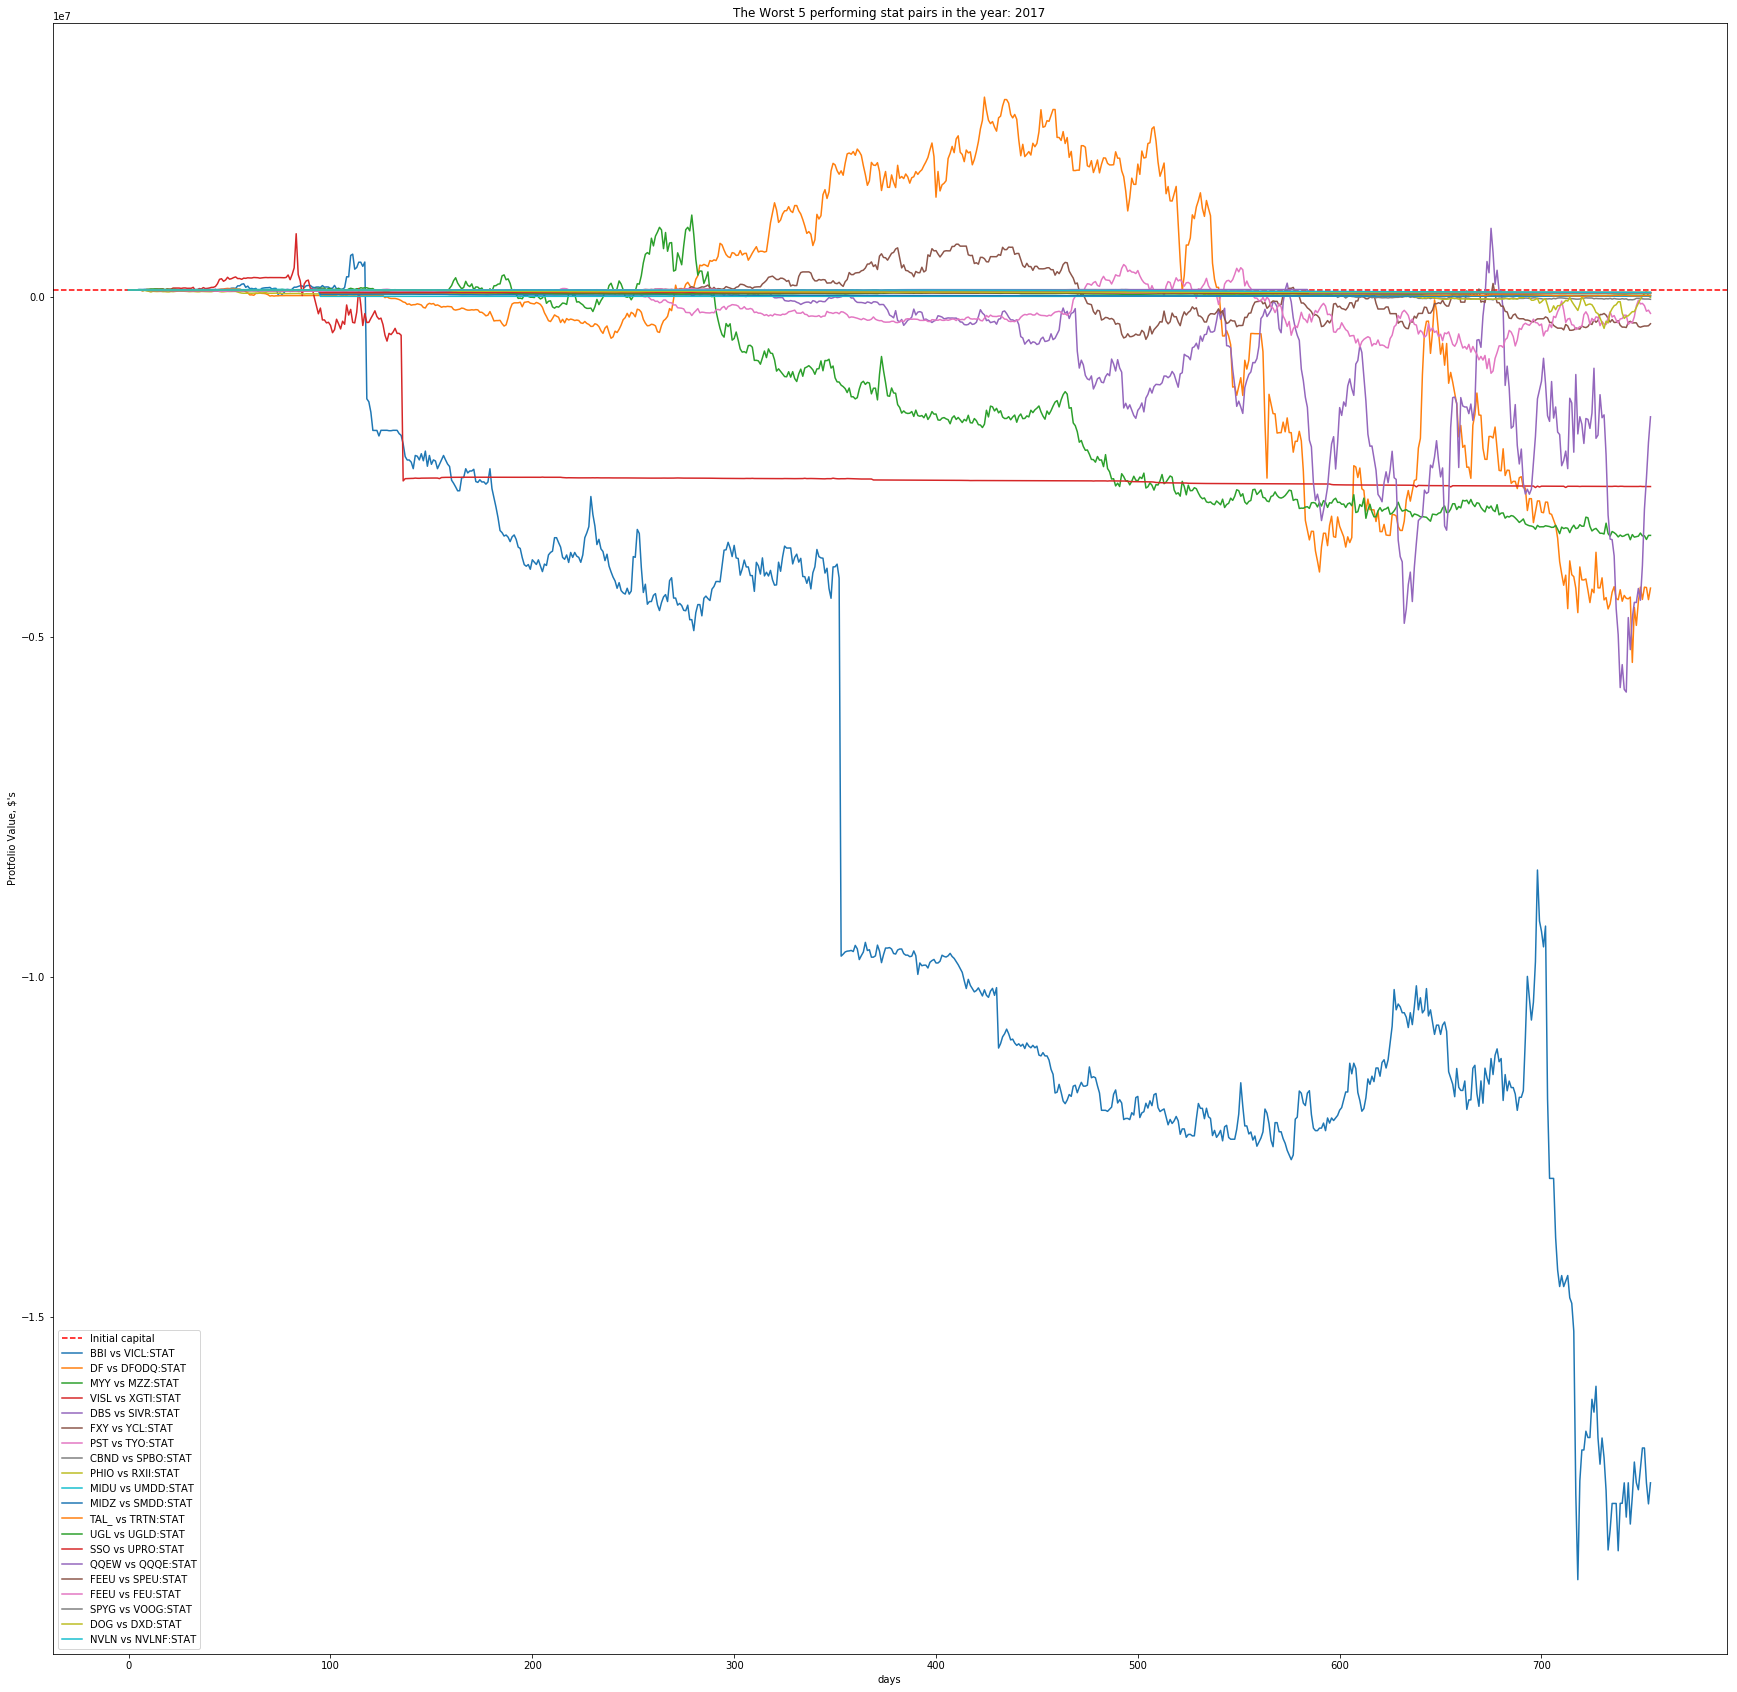

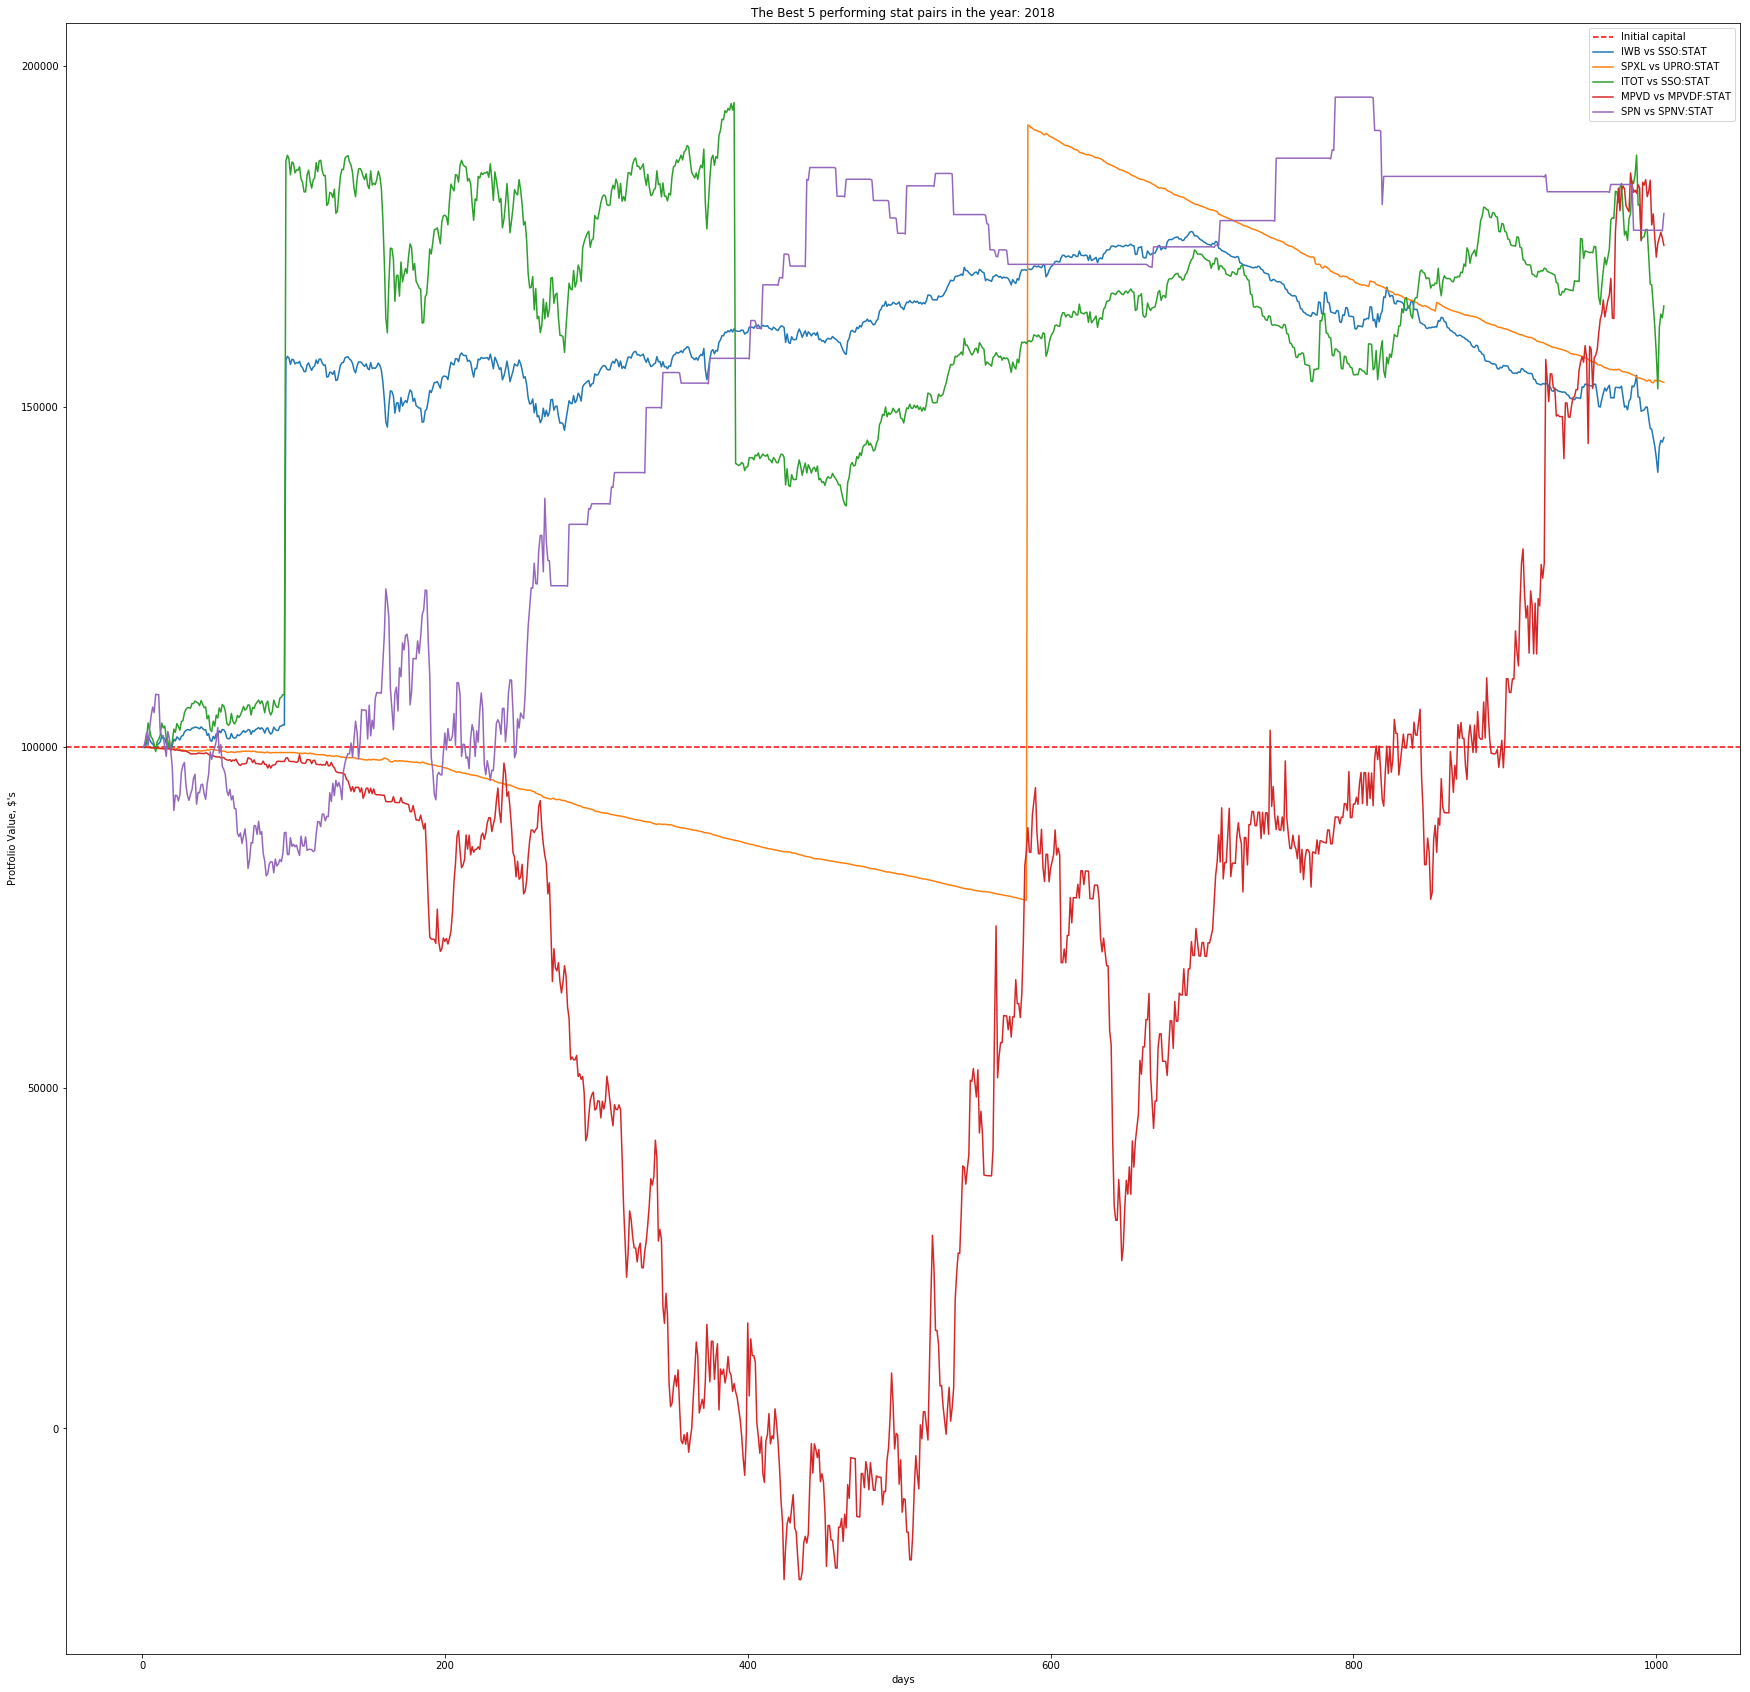

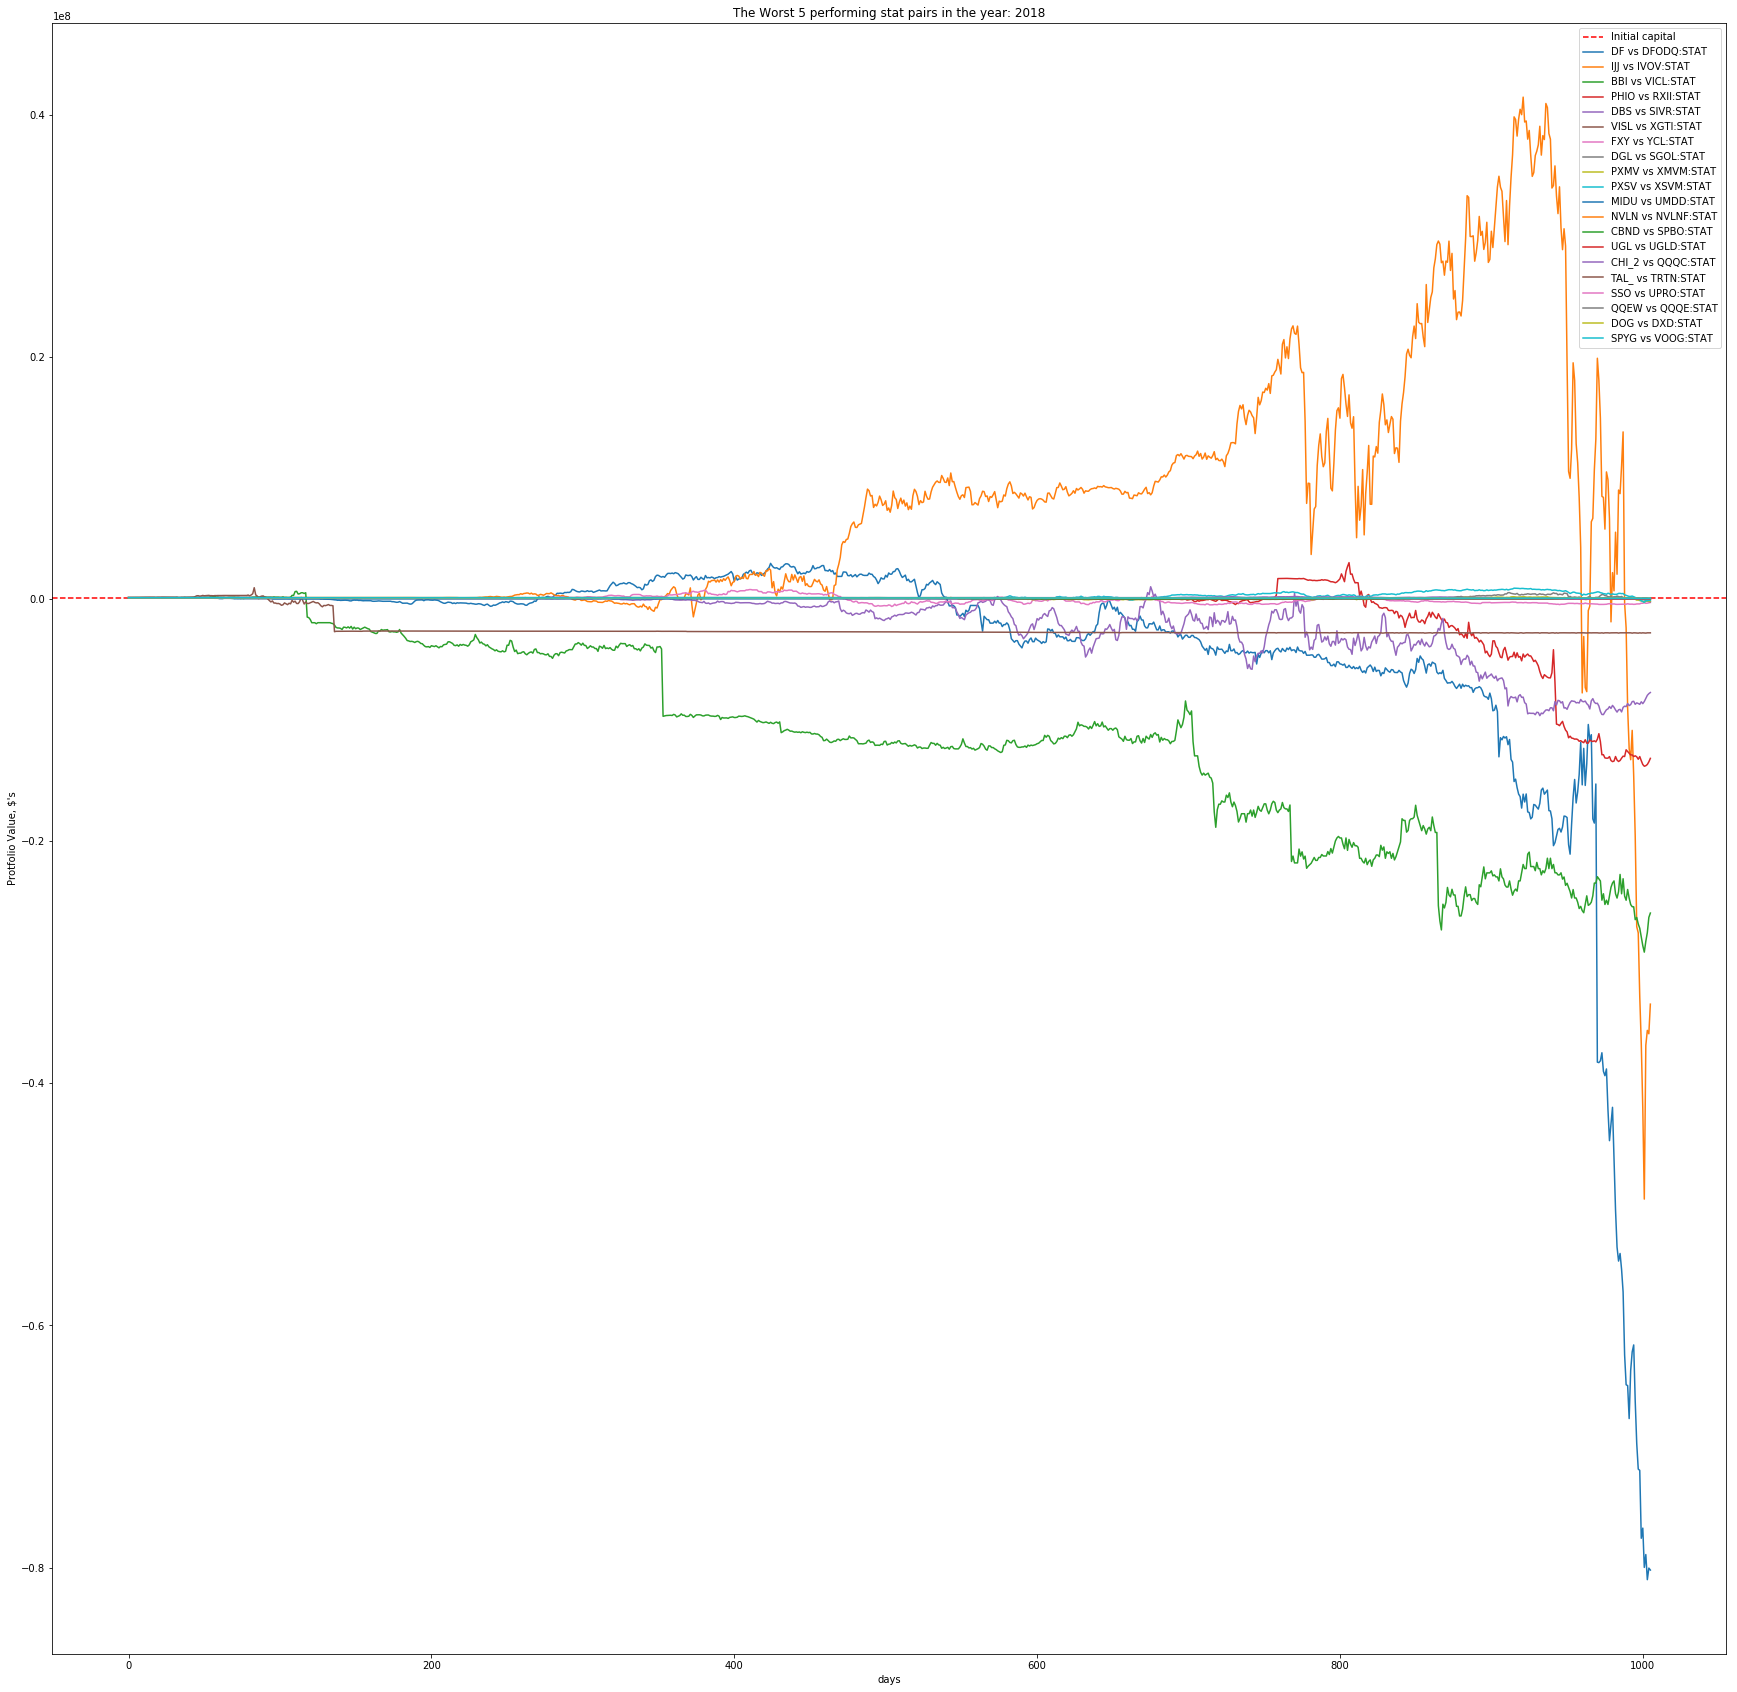

In [10]:
### GETTING STAT AVERAGE RESULTS ### 
stat_average_perf = OrderedDict()
stat_pct_mean = OrderedDict()
stat_pct_std = OrderedDict()
stat_alpha_mean = OrderedDict()
stat_beta_mean = OrderedDict()
stat_sharpe_mean = OrderedDict()
stat_maxdraw_mean = OrderedDict()

best_20_perf_stat = OrderedDict()
worst_20_perf_stat = OrderedDict()

best_20_alpha_stat = OrderedDict()
best_20_beta_stat = OrderedDict()
best_20_sharpe_stat = OrderedDict()
best_20_maxdraw_stat = OrderedDict()

worst_20_alpha_stat = OrderedDict()
worst_20_beta_stat = OrderedDict()
worst_20_sharpe_stat = OrderedDict()
worst_20_maxdraw_stat = OrderedDict()

data_len_stat = len(stat_data)
print(data_len_stat)
for year in years:
    stat_average_perf[year] = round(stat_data['perf_' + str(year)].mean(), 2)
    stat_pct_mean[year] = round(stat_data['pct_' + str(year)].mean(), 2)
    stat_pct_std[year] = round(stat_data['pct_'+str(year)].std(), 2)
    stat_alpha_mean[year] = round(stat_data['alpha_' + str(year)].mean(), 2)
    stat_beta_mean[year] = round(stat_data['beta_' + str(year)].mean(), 2)
    stat_sharpe_mean[year] = round(stat_data['sharpe_' + str(year)].mean(), 2)
    stat_maxdraw_mean[year] = round(stat_data['maxdraw_'+str(year)].mean(), 2)
    
    d = pd.read_csv(file_data + '/pair_sim_' + str(year)+'.csv')
    best_idx = [stat_data['perf_'+str(year)].sort_values()[data_len_stat-20:data_len_stat].index[i] for i in range(20)]
    worst_idx = [stat_data['perf_'+str(year)].sort_values()[:20].index[i] for i in range(20)]
    
    best_20_perf_stat[year] = [(best_idx[i], d[best_idx[i]]) for i in range(len(best_idx))]
    worst_20_perf_stat[year] = [(worst_idx[i], d[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_20_alpha_stat[year] = [(best_idx[i], stat_data['alpha_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_20_alpha_stat[year] = [(worst_idx[i], stat_data['alpha_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_20_beta_stat[year] = [(best_idx[i], stat_data['beta_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_20_beta_stat[year] = [(worst_idx[i], stat_data['beta_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]

    best_20_sharpe_stat[year] = [(best_idx[i], stat_data['sharpe_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_20_sharpe_stat[year] = [(worst_idx[i], stat_data['sharpe_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
     
    best_20_maxdraw_stat[year] = [(best_idx[i], stat_data['maxdraw_'+str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_20_maxdraw_stat[year] = [(worst_idx[i], stat_data['maxdraw_'+str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]

colnames = ['average portfolio value', 'average percentage change', 'average standard deviation',
            'average alpha', 'average beta', 'average sharpe ratio', 'average max drawdown']

list_of_dicts = [stat_average_perf,stat_pct_mean, stat_pct_std,
                 stat_alpha_mean, stat_beta_mean,stat_sharpe_mean, stat_maxdraw_mean ]

main_df = pd.DataFrame()
main_df['year'] = pd.Series(years)

for i in range(len(list_of_dicts)):
    df = pd.DataFrame(data=list(list_of_dicts[i].items()) , columns=['year', colnames[i]] )
    main_df = pd.concat([main_df, df[colnames[i]]], axis=1)
main_df.to_latex(buf=file_data+'stat-perf.txt', index=True)
    

for year in years:
    fig, ax = plt.subplots(figsize = (30, 30))
    ax.set_ylabel("Protfolio Value, $'s")
    ax.set_xlabel('days')
    plt.axhline(100000, color='red', ls='--', label='Initial capital')
    plt.title('The Best 5 performing stat pairs in the year: {}'.format(year))
    
    for i in range(5):
        ax.plot(best_20_perf_stat[year][i][1])
    plt.legend(loc='best')
    plt.savefig(fname=file_data + '/PLOTS/STAT/best_5_stat_year_' + str(year) + '.png')
    plt.show()
    
    fig1, ax1 = plt.subplots(figsize = (30, 30))
    ax1.set_ylabel("Protfolio Value, $'s")
    ax1.set_xlabel('days')
    plt.axhline(100000, color='red', ls='--', label='Initial capital')    
    for i in range(len(worst_20_perf_stat[year])):
        ax1.plot(worst_20_perf_stat[year][i][1])
        plt.title('The Worst 5 performing stat pairs in the year: {}'.format(year))
    plt.legend(loc='best')
    plt.savefig(fname=file_data + 'PLOTS/STAT/worst_5_stat_year_' + str(year) + '.png')
    plt.show() 

62


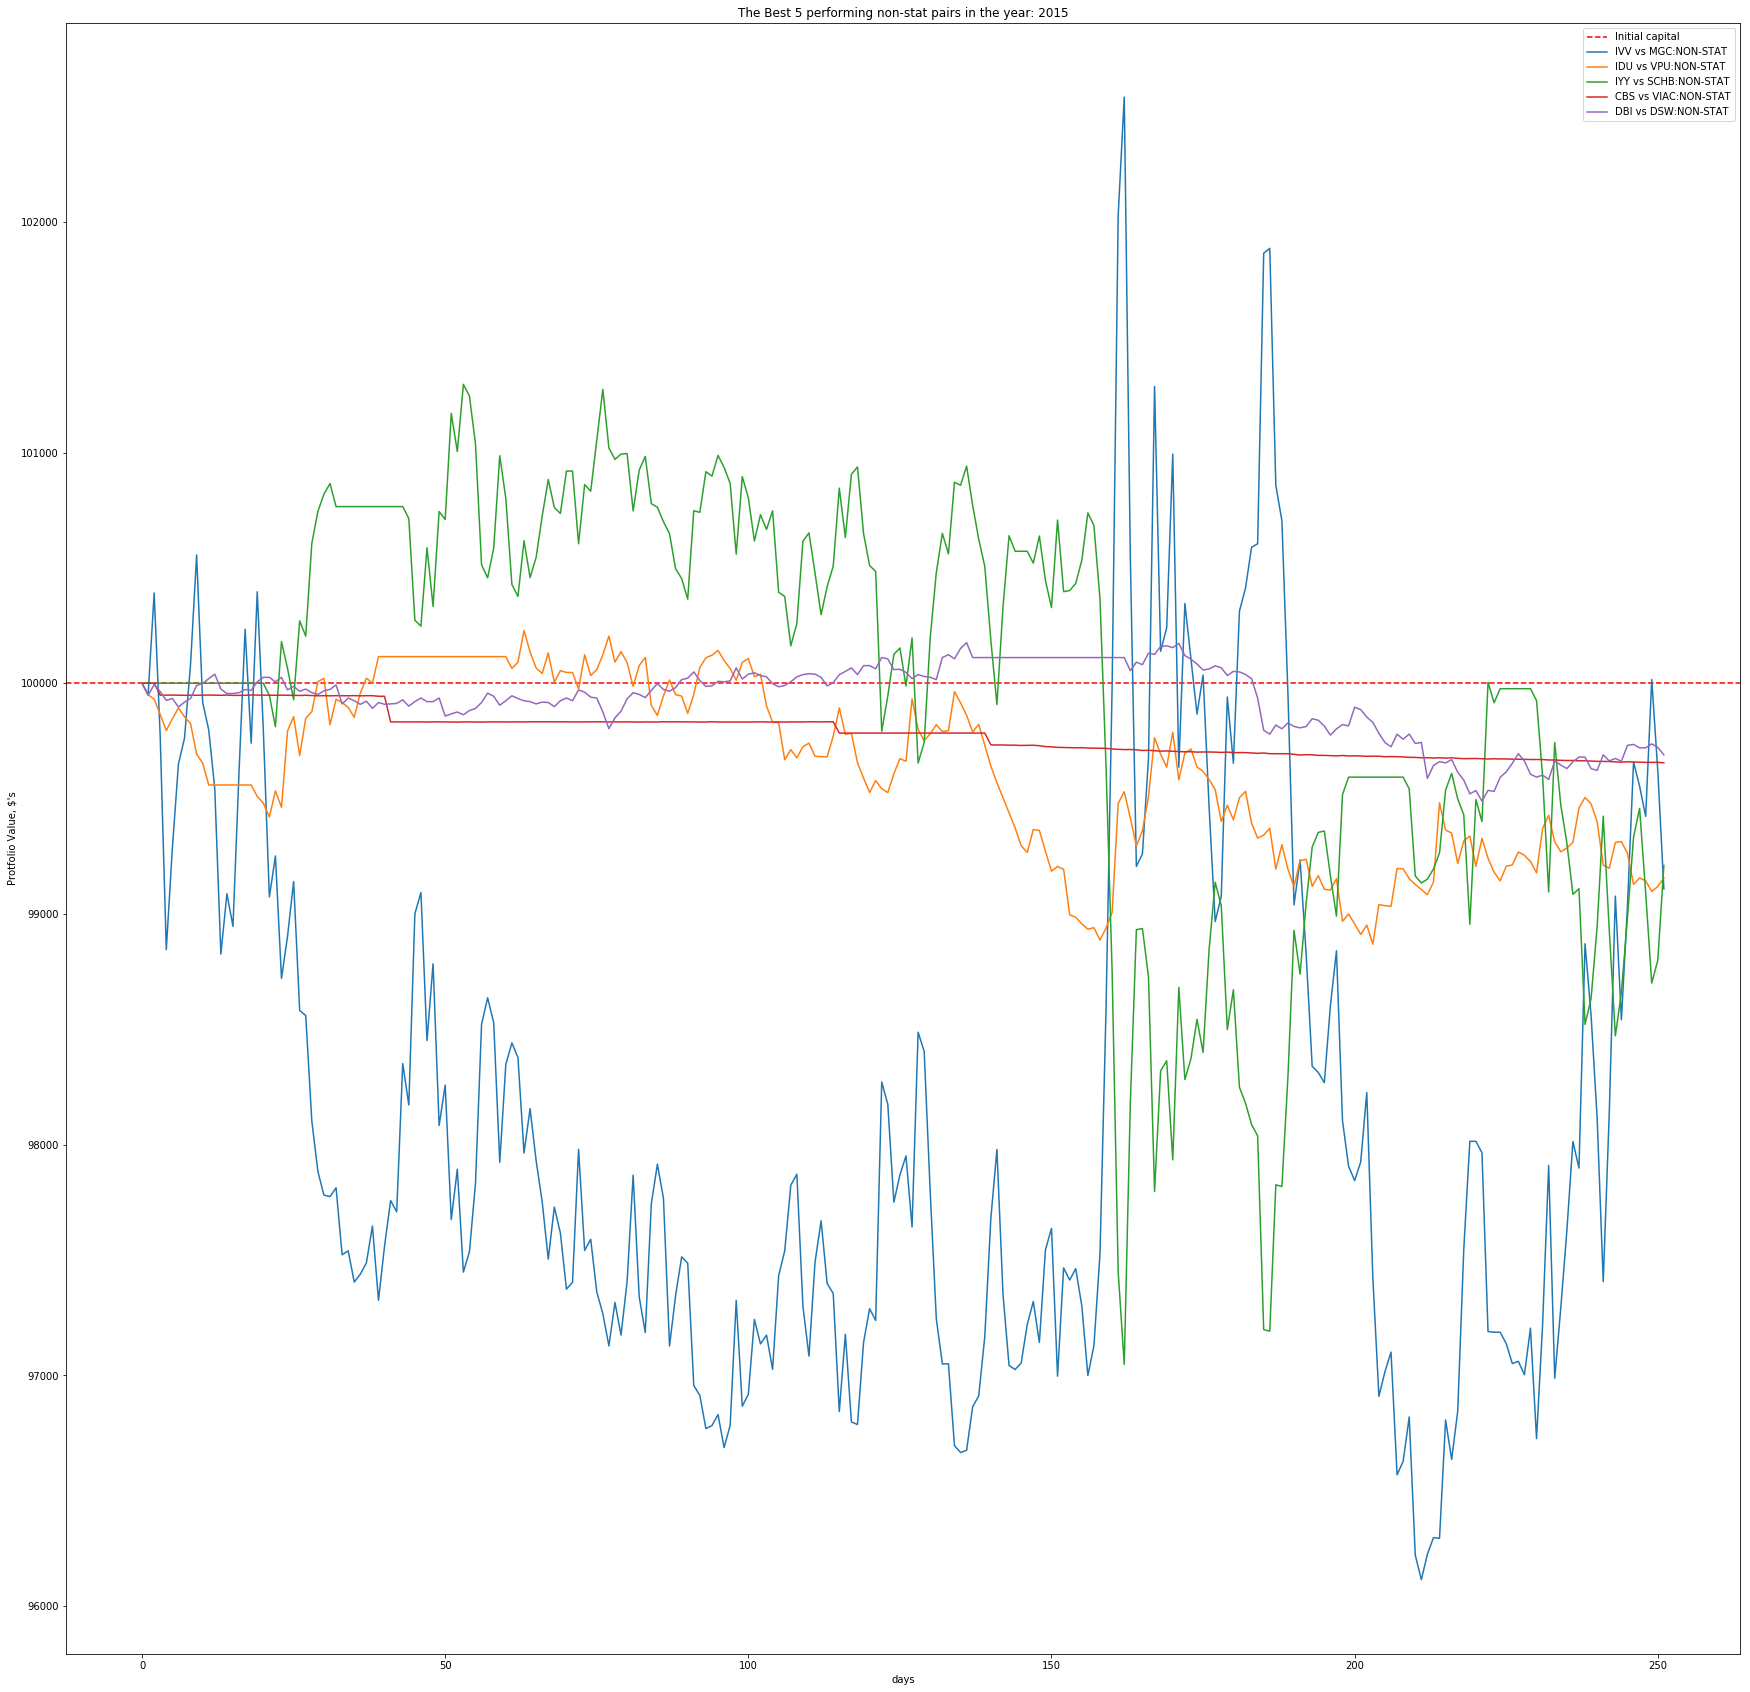

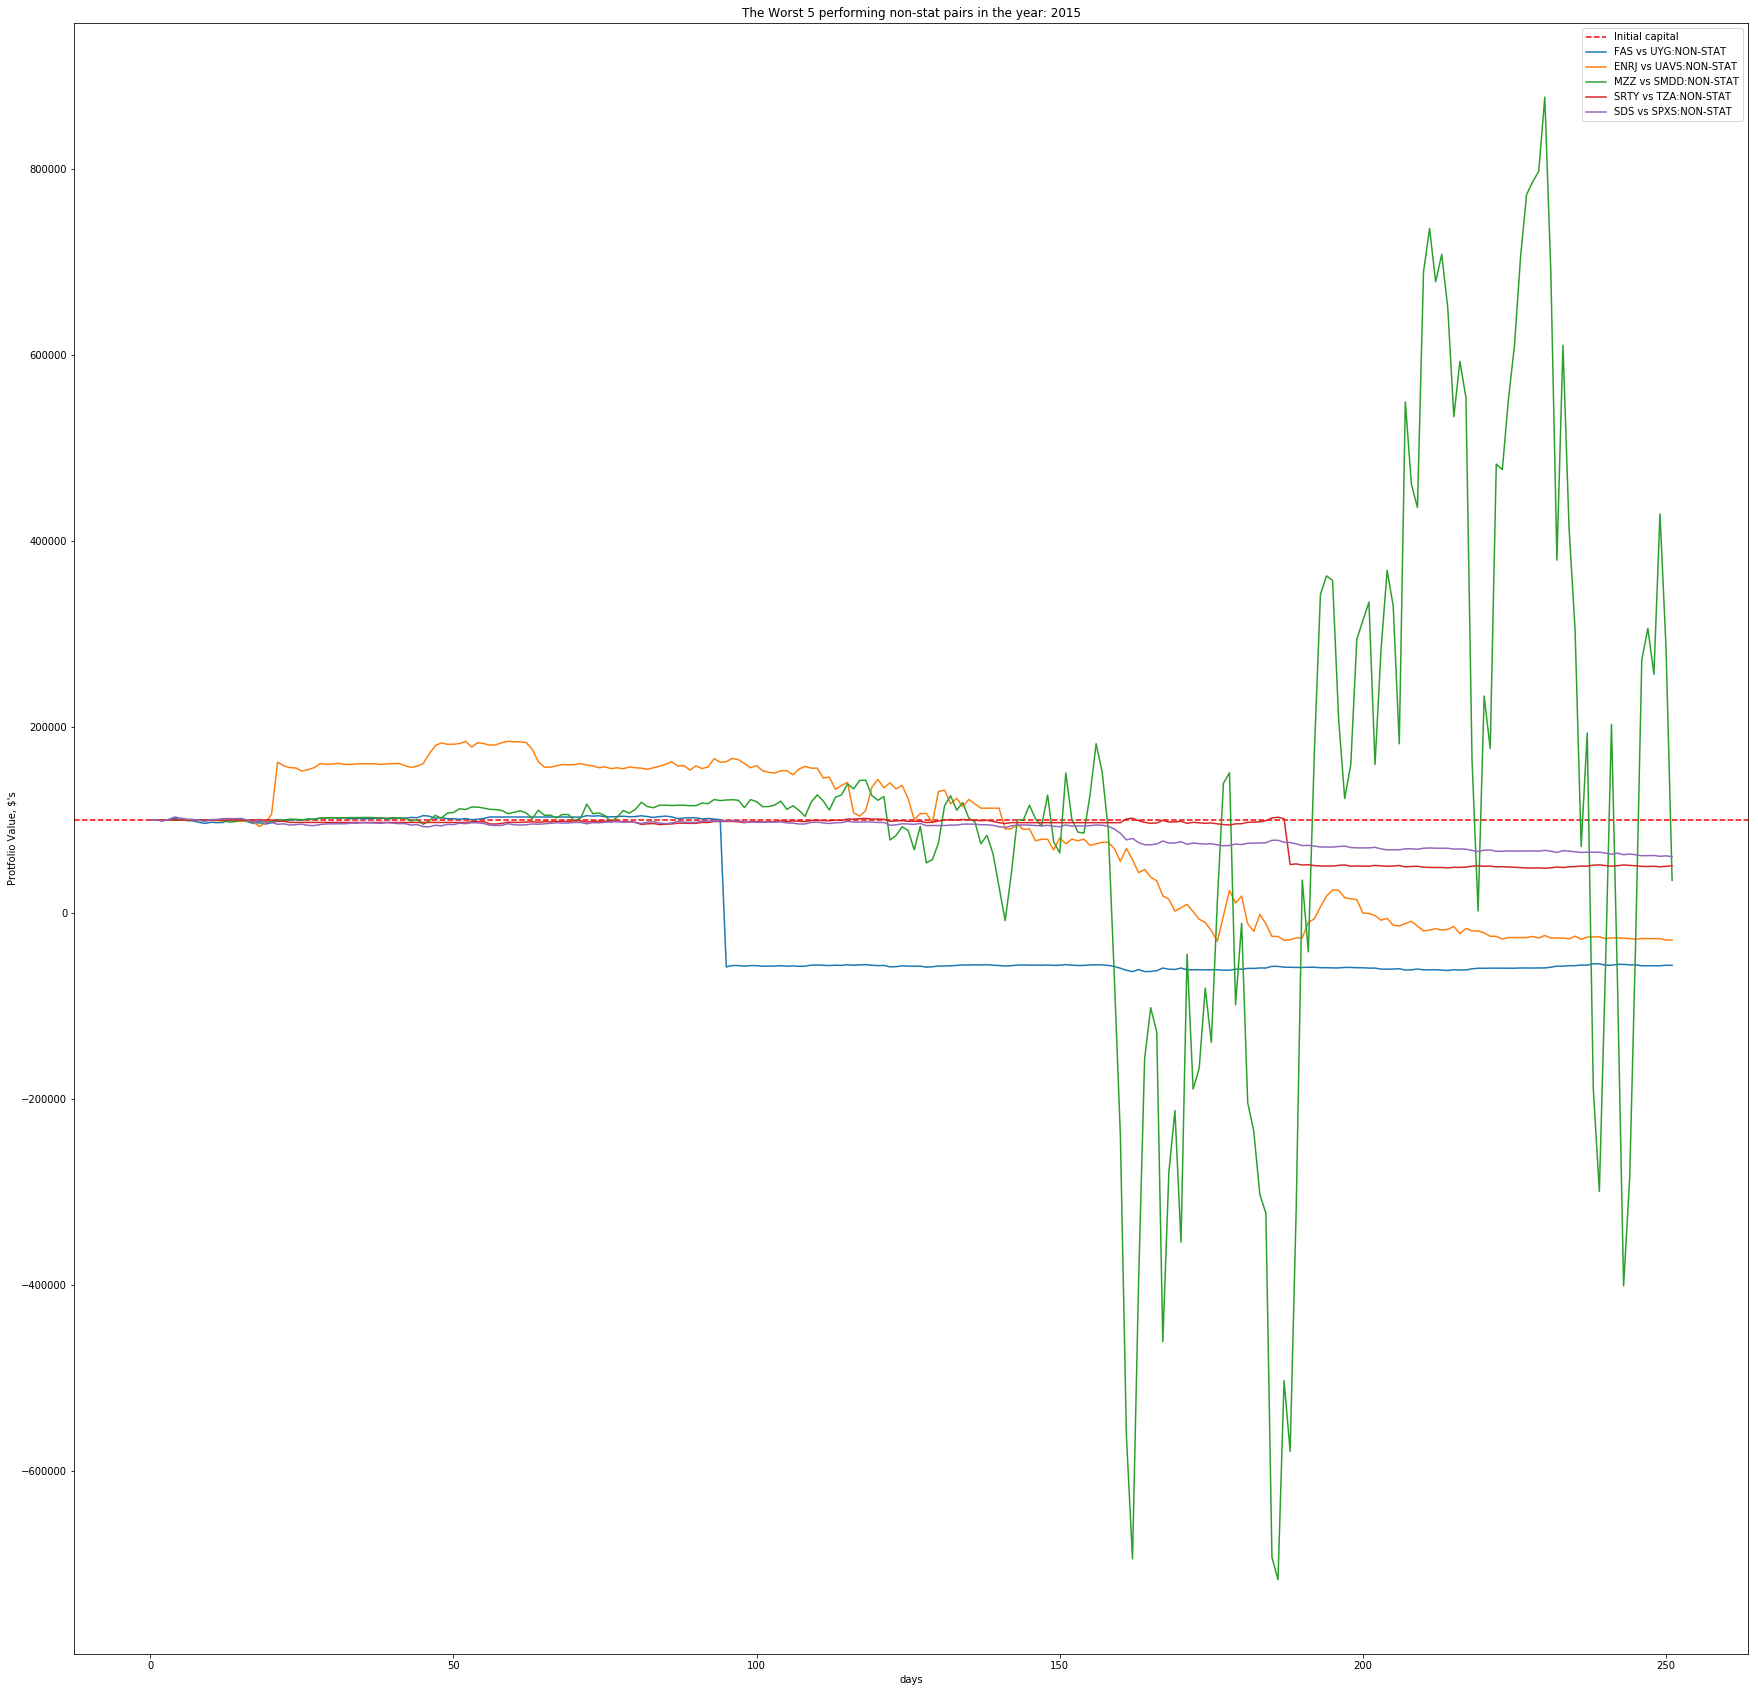

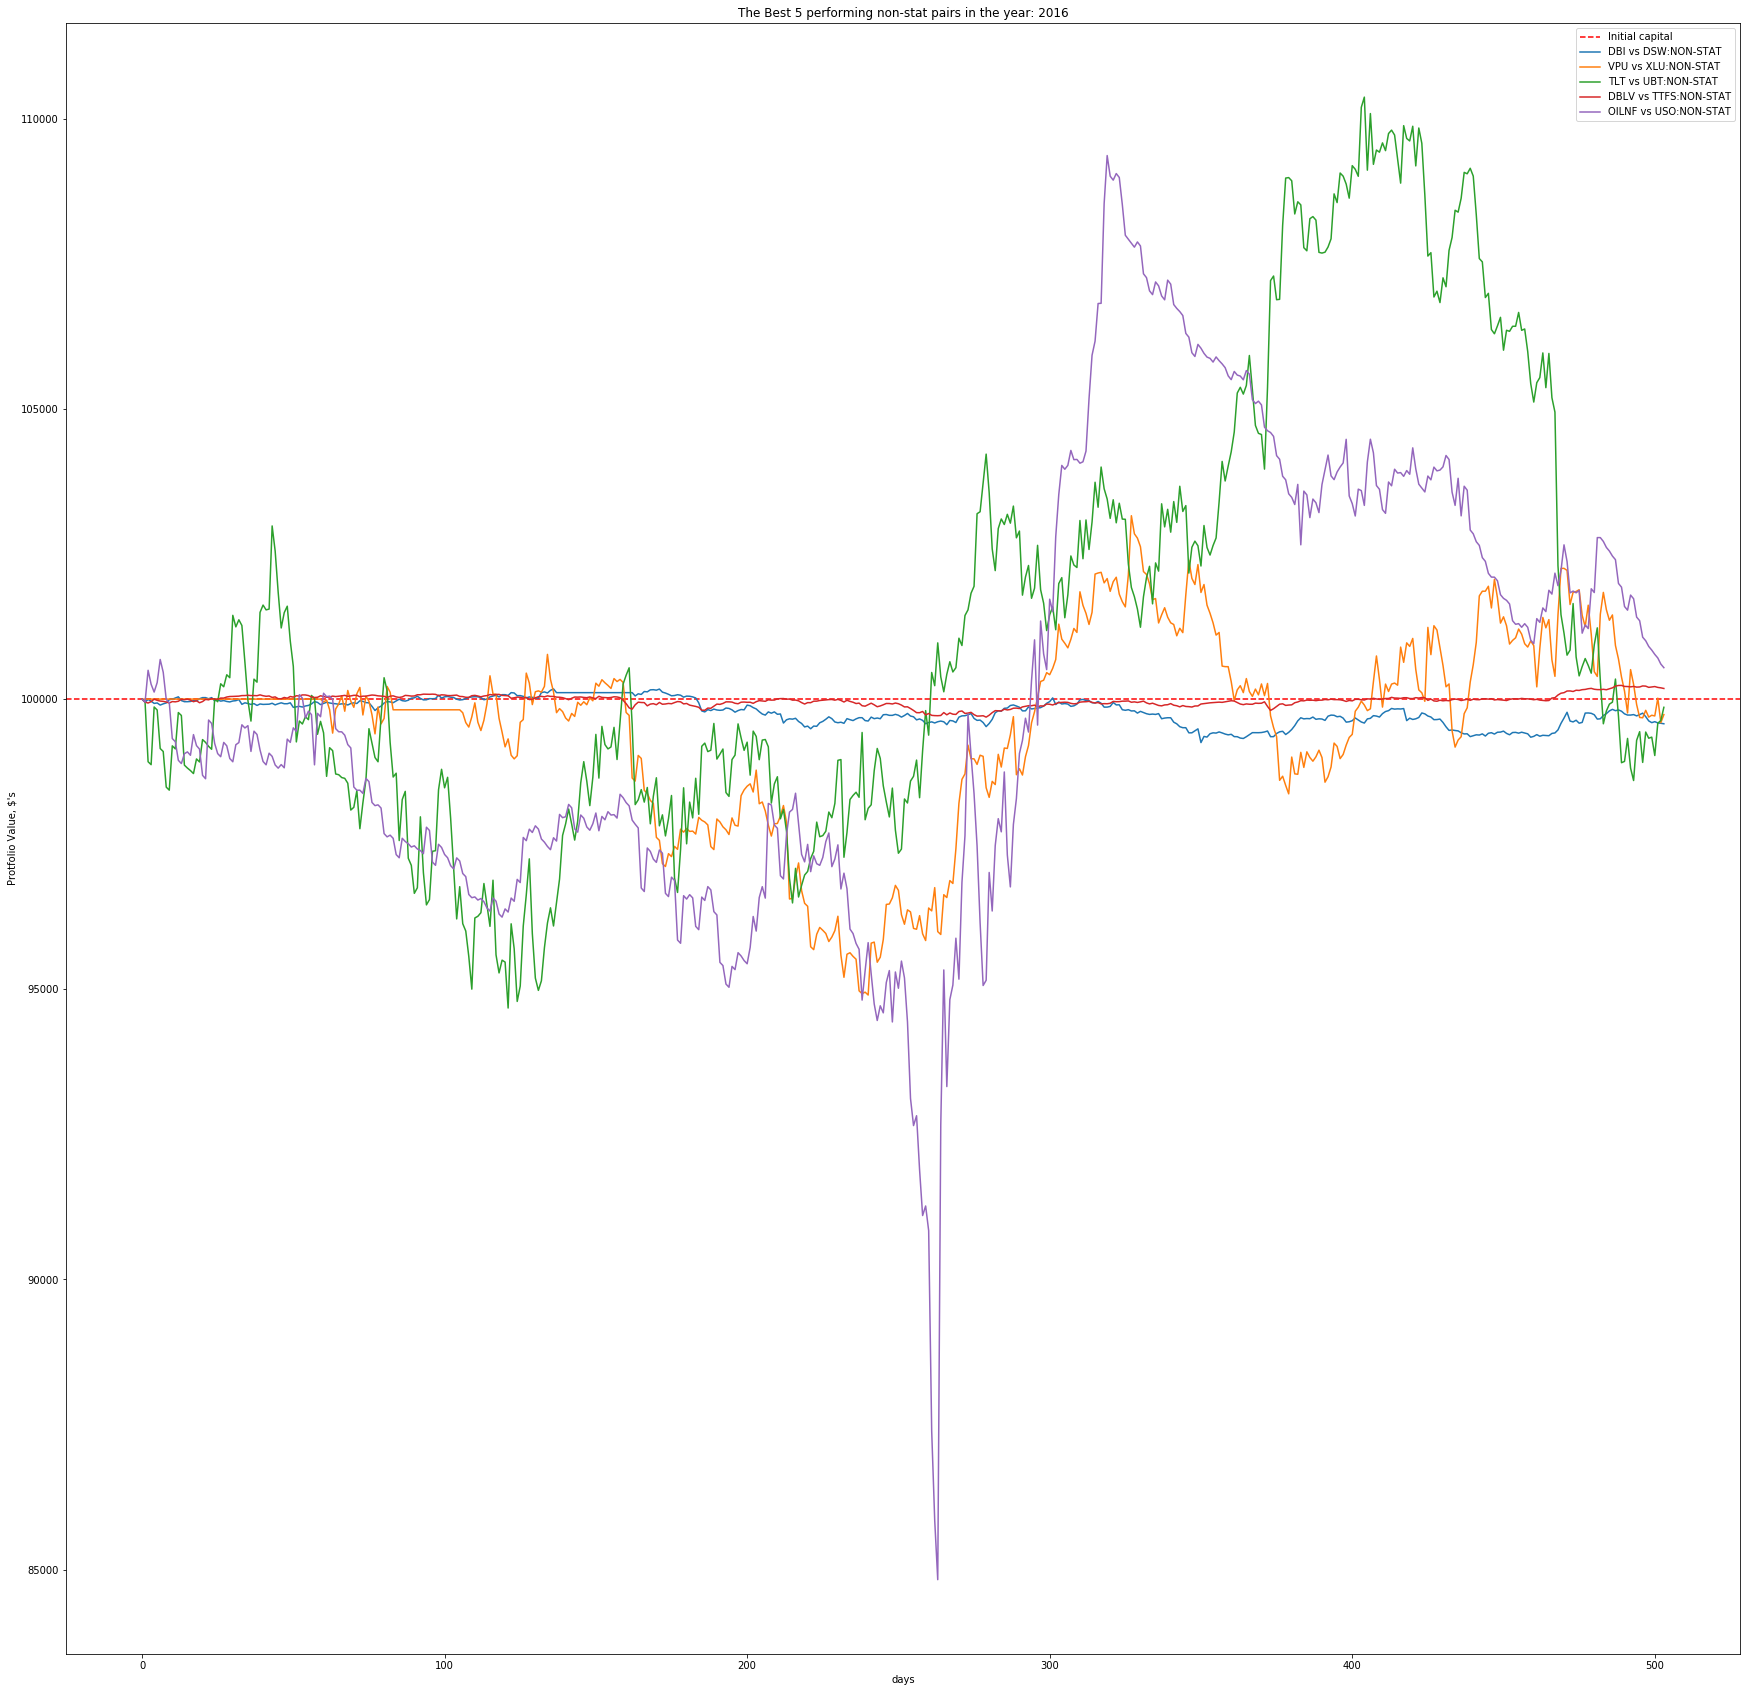

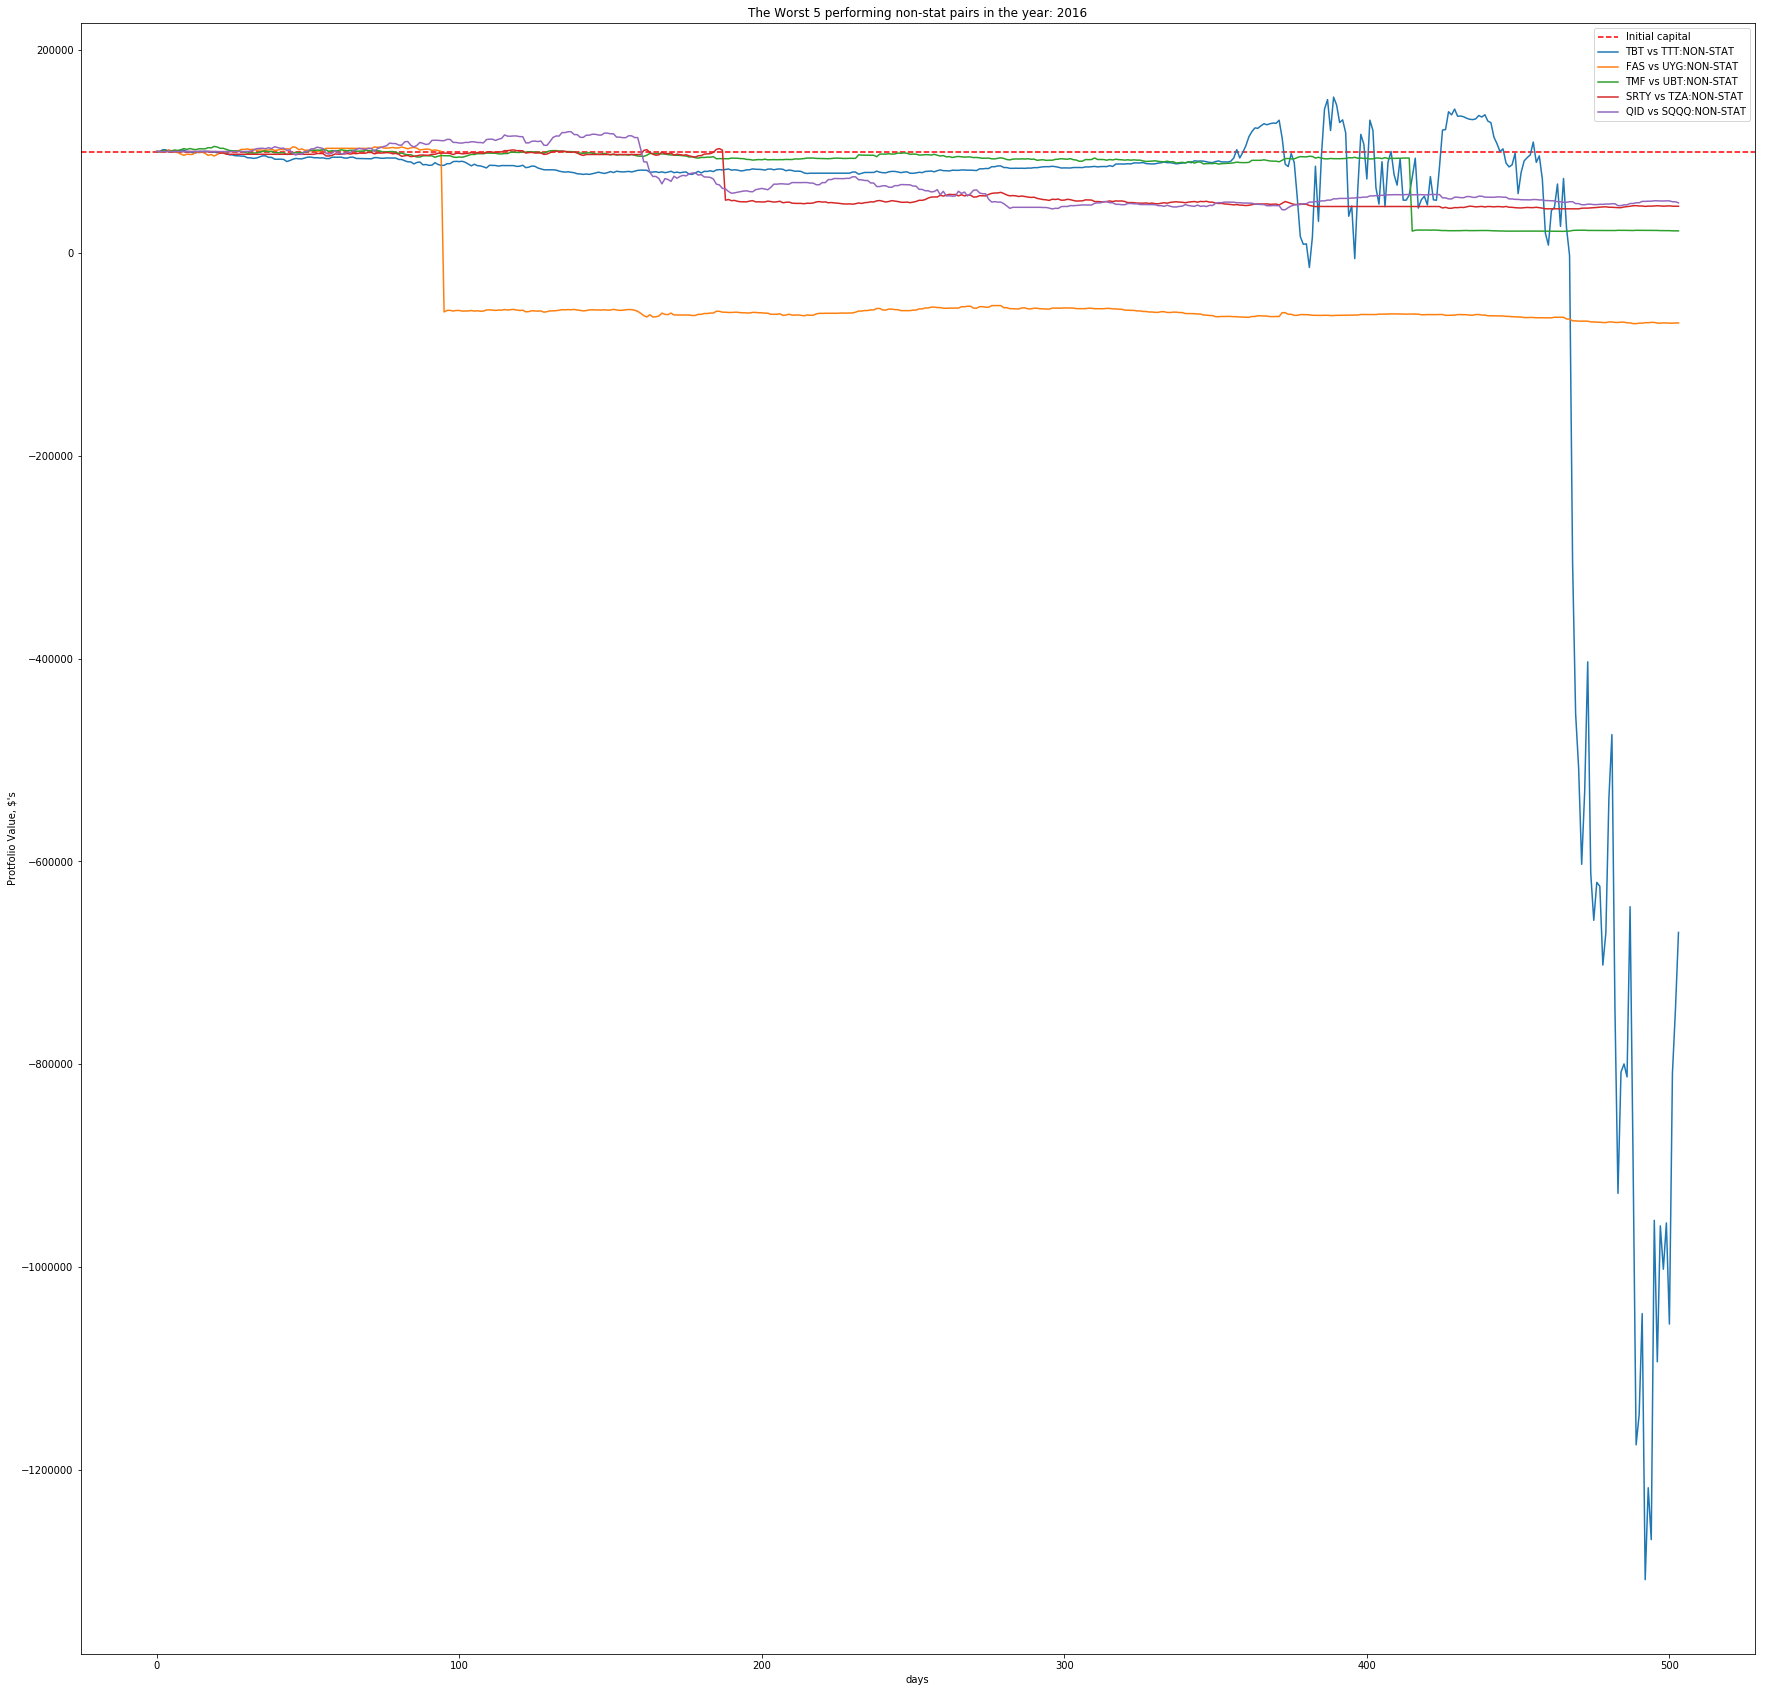

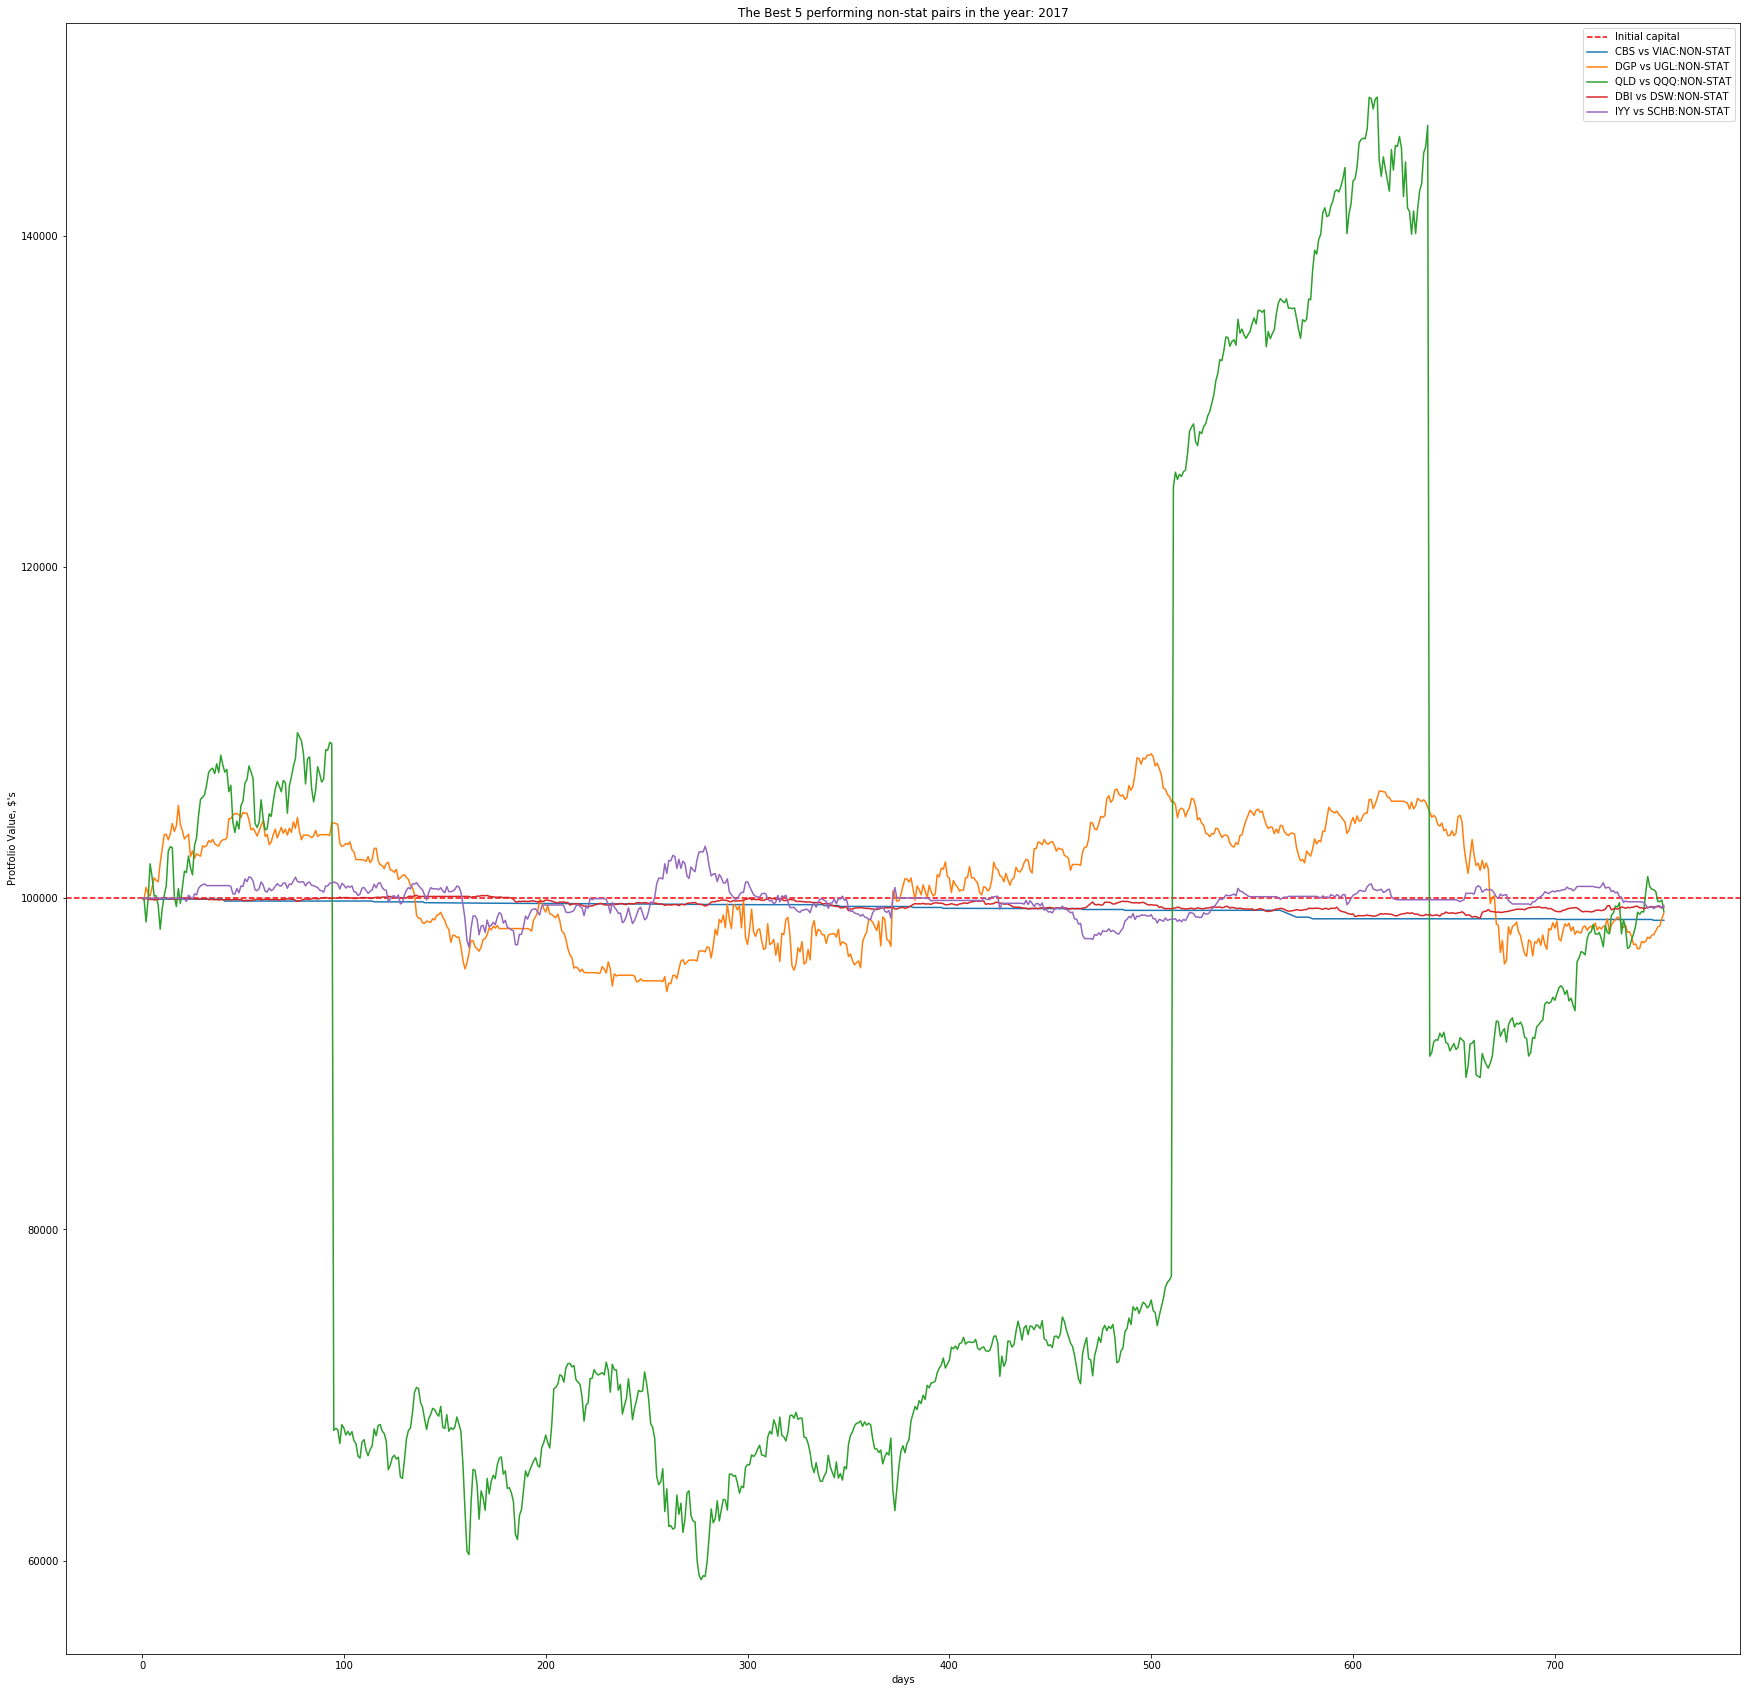

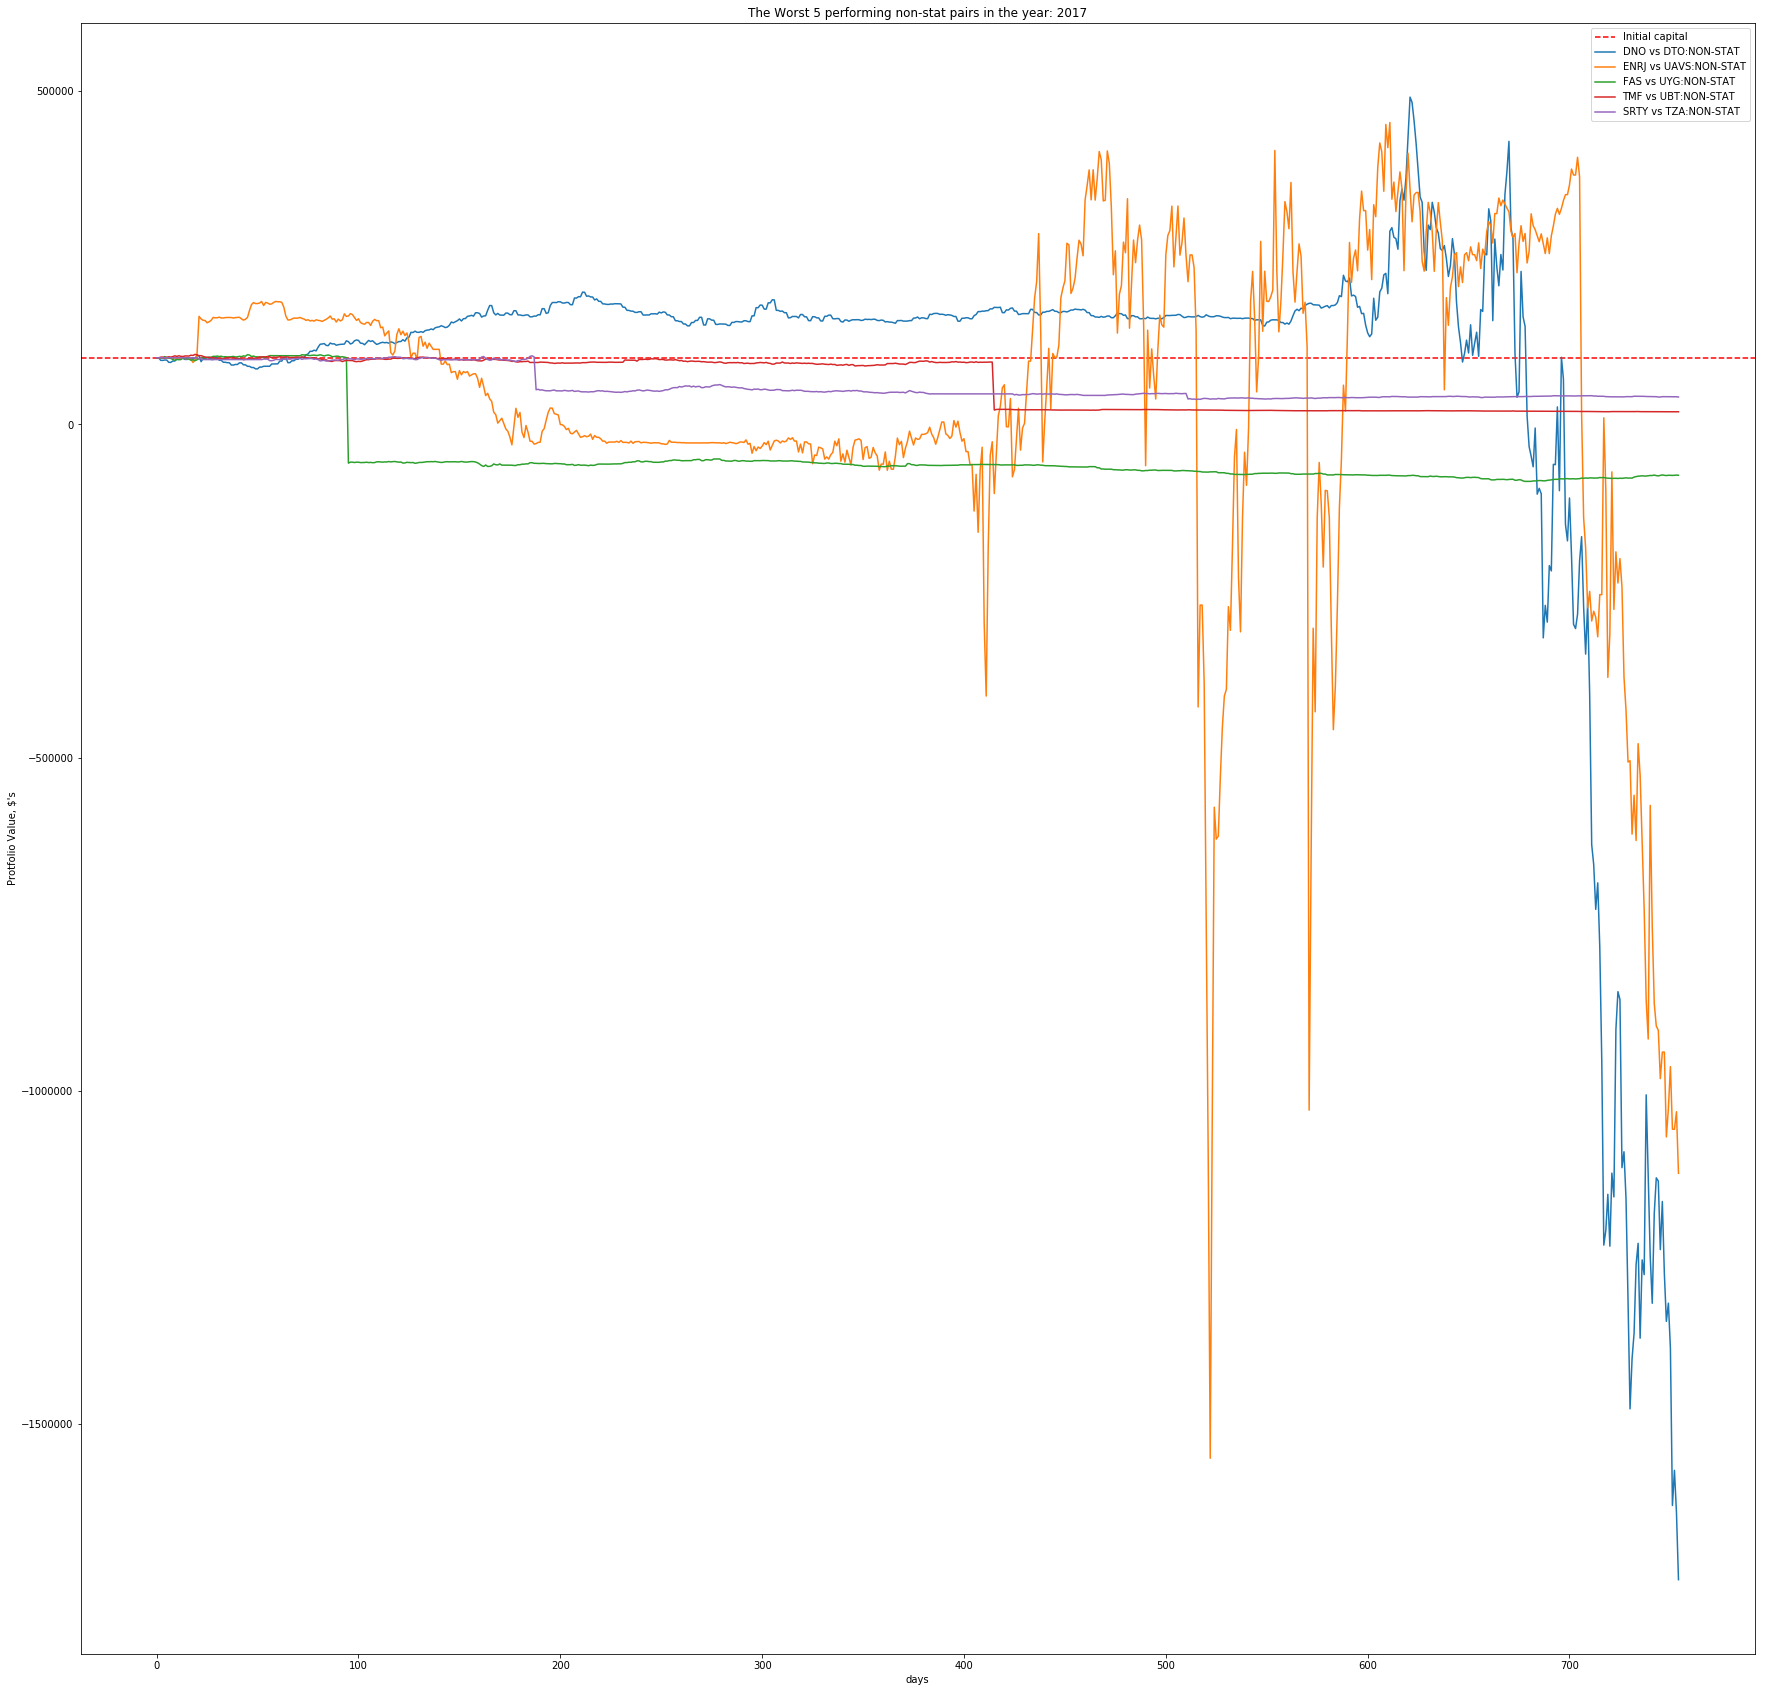

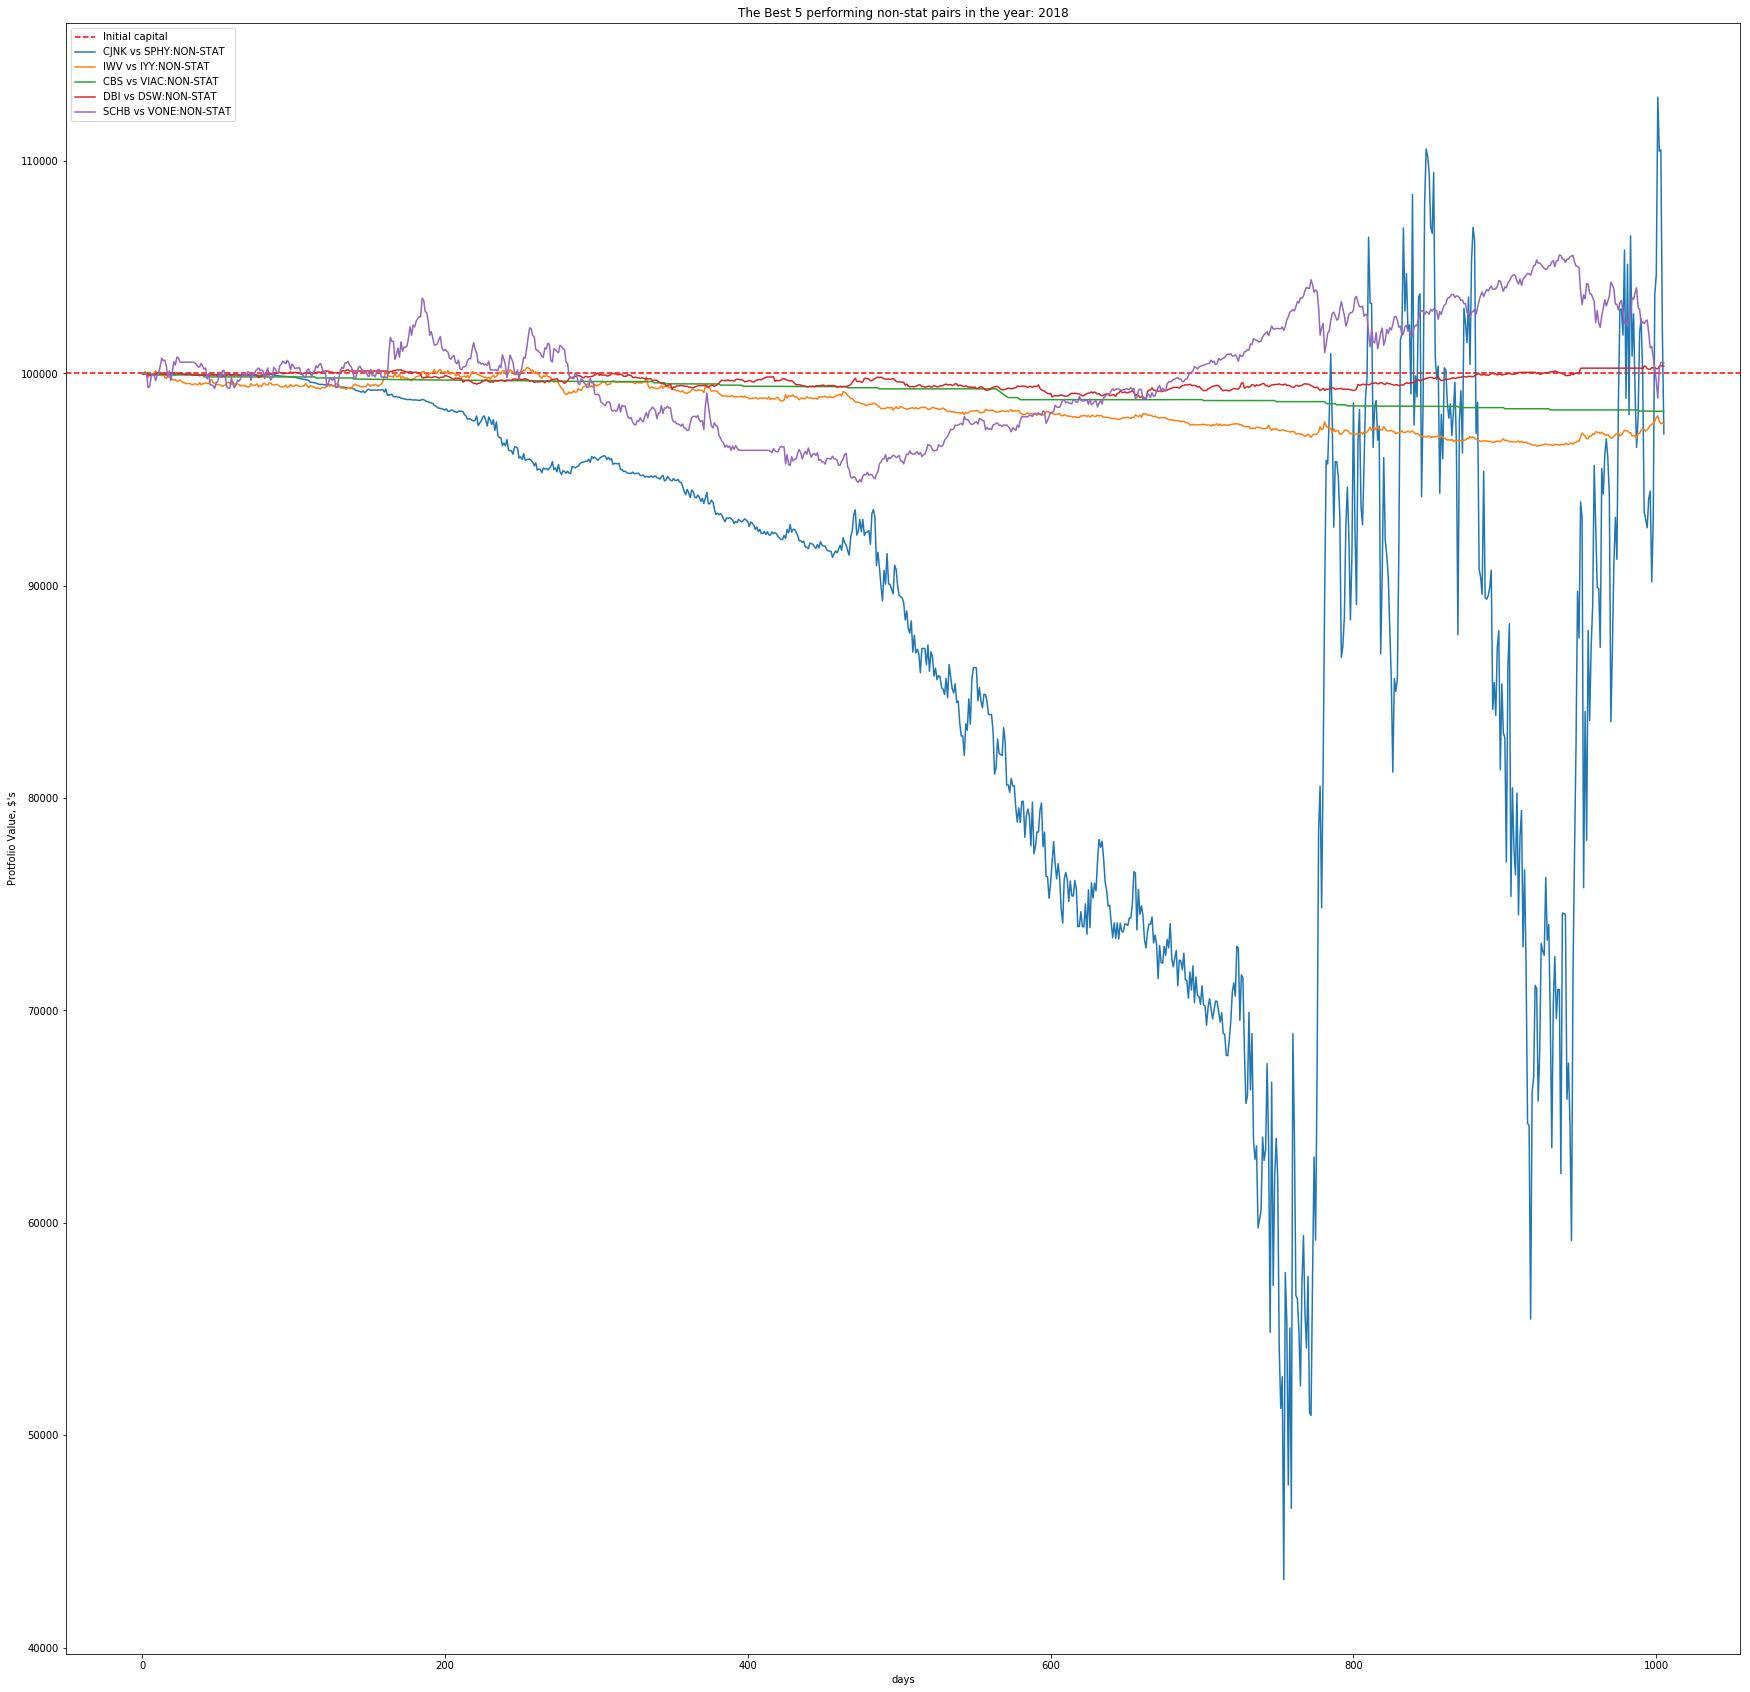

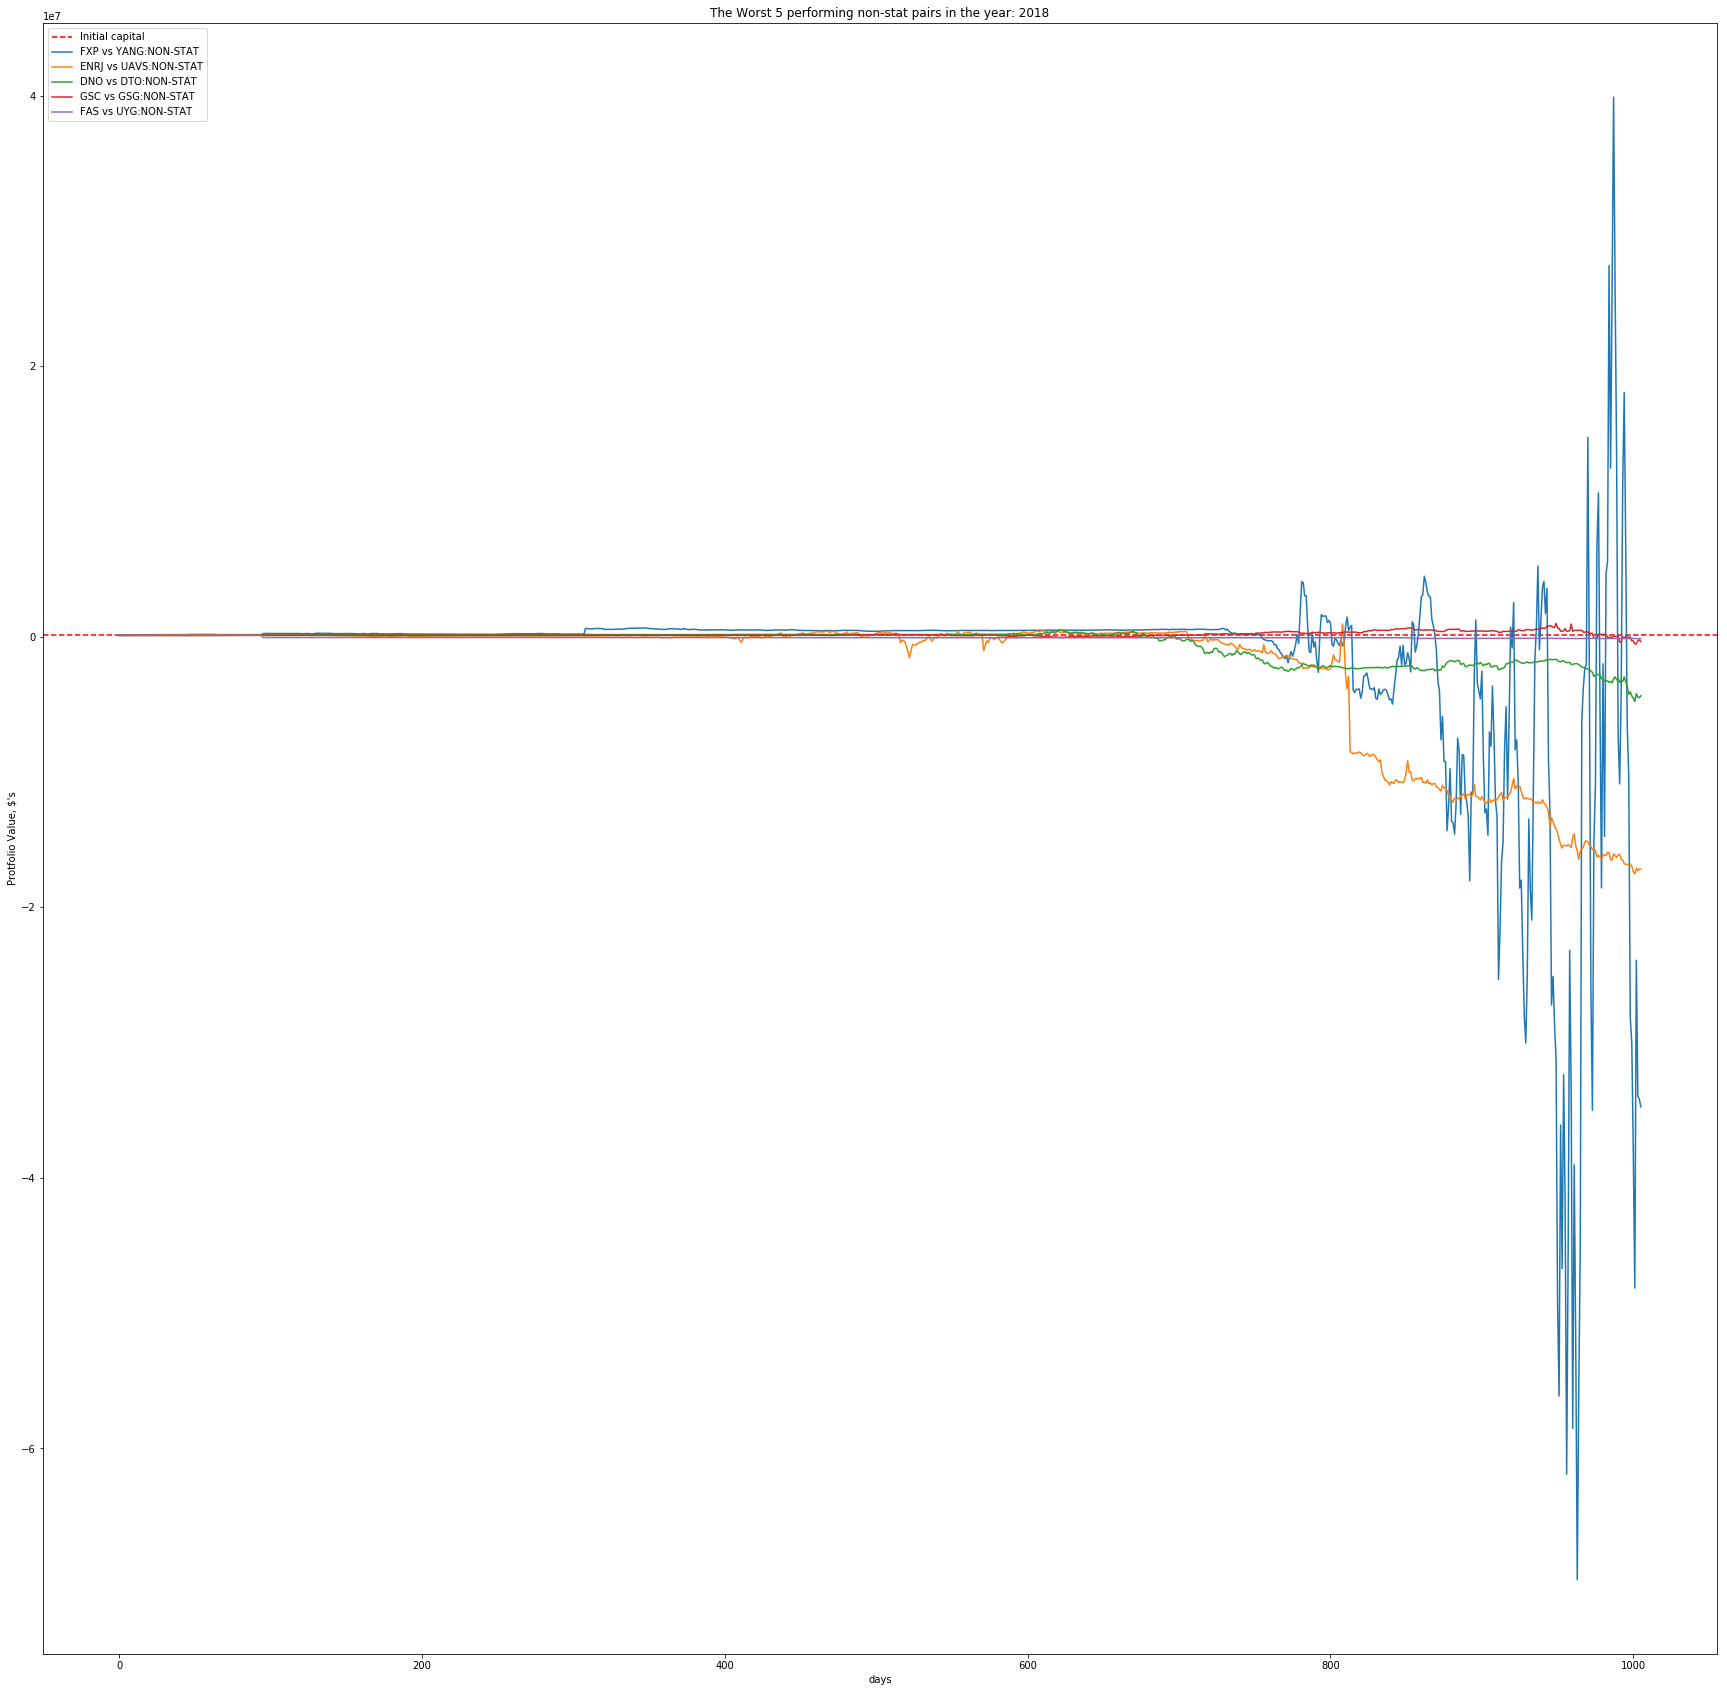

In [11]:
### GETTING NON-STAT AVERAGE RESULTS ### 
nstat_average_perf = OrderedDict()
nstat_pct_mean = OrderedDict()
nstat_pct_std = OrderedDict()
nstat_alpha_mean = OrderedDict()
nstat_beta_mean = OrderedDict()
nstat_sharpe_mean = OrderedDict()
nstat_maxdraw_mean = OrderedDict()

best_20_perf_nstat = OrderedDict()
worst_20_perf_nstat = OrderedDict()

best_20_alpha_nstat = OrderedDict()
best_20_beta_nstat = OrderedDict()
best_20_sharpe_nstat = OrderedDict()
best_20_maxdraw_nstat = OrderedDict()

worst_20_alpha_nstat = OrderedDict()
worst_20_beta_nstat = OrderedDict()
worst_20_sharpe_nstat = OrderedDict()
worst_20_sharpe_nstat = OrderedDict()
worst_20_maxdraw_nstat = OrderedDict()

data_len_nstat = len(nstat_data)
print(data_len_nstat)

for year in years:
    nstat_average_perf[year] = round(nstat_data['perf_' + str(year)].mean(), 2)
    nstat_pct_mean[year] = round(nstat_data['pct_' + str(year)].mean(), 2)
    nstat_pct_std[year] = round(nstat_data['pct_'+str(year)].std(), 2)
    nstat_alpha_mean[year] = round(nstat_data['alpha_' + str(year)].mean(), 2)
    nstat_beta_mean[year] = round(nstat_data['beta_' + str(year)].mean(), 2)
    nstat_sharpe_mean[year] = round(nstat_data['sharpe_' + str(year)].mean(), 2)
    nstat_maxdraw_mean[year] = round(nstat_data['maxdraw_'+str(year)].mean(), 2)
    
    d = pd.read_csv(file_data + '/pair_sim_' + str(year)+'.csv')
    best_idx = [nstat_data['perf_'+str(year)].sort_values()[data_len_nstat-20:data_len_nstat].index[i] for i in range(20)]
    worst_idx = [nstat_data['perf_'+str(year)].sort_values()[:20].index[i] for i in range(20)]
    
    best_20_perf_nstat[year] = [(best_idx[i], d[best_idx[i]]) for i in range(len(best_idx))]
    worst_20_perf_nstat[year] = [(worst_idx[i], d[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_20_alpha_nstat[year] = [(best_idx[i], nstat_data['alpha_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_20_alpha_nstat[year] = [(worst_idx[i], nstat_data['alpha_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
    
    best_20_beta_nstat[year] = [(best_idx[i], nstat_data['beta_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_20_beta_nstat[year] = [(worst_idx[i], nstat_data['beta_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]

    best_20_sharpe_nstat[year] = [(best_idx[i], nstat_data['sharpe_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_20_sharpe_nstat[year] = [(worst_idx[i], nstat_data['sharpe_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]

    best_20_maxdraw_nstat[year] = [(best_idx[i], nstat_data['maxdraw_' + str(year)].loc[best_idx[i]]) for i in range(len(best_idx))]
    worst_20_maxdraw_nstat[year] = [(worst_idx[i], nstat_data['maxdraw_' + str(year)].loc[worst_idx[i]]) for i in range(len(worst_idx))]
    
#### AVERAGE NON-STAT
colnames = ['average portfolio value', 'average percentage change', 'average standard deviation',
            'average alpha', 'average beta', 'average sharpe ratio', 'average max drawdown']

list_of_dicts = [nstat_average_perf,nstat_pct_mean, nstat_pct_std,
                 nstat_alpha_mean, nstat_beta_mean,nstat_sharpe_mean, nstat_maxdraw_mean ]

main_df = pd.DataFrame()
main_df['year'] = pd.Series(years)

for i in range(len(list_of_dicts)):
    df = pd.DataFrame(data=list(list_of_dicts[i].items()) , columns=['year', colnames[i]] )
    main_df = pd.concat([main_df, df[colnames[i]]], axis=1)
main_df.to_latex(buf=file_data+'non-stat-perf.txt', index=False)

for year in years:
    fig, ax = plt.subplots(figsize = (30, 30))
    ax.set_ylabel("Protfolio Value, $'s")
    ax.set_xlabel('days')
    plt.axhline(100000, color='red', ls='--', label='Initial capital')
    plt.title('The Best 5 performing non-stat pairs in the year: {}'.format(year))
    
    for i in range(5):
        ax.plot(best_20_perf_nstat[year][i][1])
    plt.legend(loc='best')
    plt.savefig(fname=file_data + '/PLOTS/NON STAT/best_5_stat_year_' + str(year) + '.png')
    plt.show()
    
    fig1, ax1 = plt.subplots(figsize = (30, 30))
    ax1.set_ylabel("Protfolio Value, $'s")
    ax1.set_xlabel('days')
    plt.axhline(100000, color='red', ls='--', label='Initial capital')    
    
    for i in range(5):
        ax1.plot(worst_20_perf_nstat[year][i][1])
        plt.title('The Worst 5 performing non-stat pairs in the year: {}'.format(year))
    plt.legend(loc='best')
    plt.savefig(fname=file_data + 'PLOTS/NON STAT/worst_5_stat_year_' + str(year) + '.png')
    plt.show() 

In [12]:
count_aboves_nstat = []
nstat_perf = []
nstat_alpha = []
nstat_beta = []
nstat_sharpe = []
nstat_maxdraw = []

num_of_tradable_pairs = []
for year in years:
    above = nstat_data[nstat_data['perf_' + str(year)] > 100000]
    
    nstat_yearly_best = above[['perf_'+str(year), 'alpha_'+str(year), 'beta_'+str(year),
                         'sharpe_'+str(year), 'maxdraw_'+str(year)]]
    
    nstat_yearly_best.to_latex(buf=file_data + 'nstat_yearly_best_' + str(year) + '.txt', index=True)
    count_aboves_nstat.append((year, len(above)))
    nstat_perf.append( round(above['perf_'+str(year)].mean(), 2))
    nstat_alpha.append( round(above['alpha_'+str(year)].mean(),2))
    nstat_beta.append( round(above['beta_'+str(year)].mean(), 2))
    nstat_sharpe.append( round(above['sharpe_'+str(year)].mean(), 2))
    nstat_maxdraw.append( round(above['maxdraw_'+str(year)].mean(), 2))
    print('---- NON-STATONAIRY PAIRS ----')
    print(nstat_yearly_best)
    
    
    
count_aboves_stat = []
stat_perf = []
stat_alpha = []
stat_beta = []
stat_sharpe = []
stat_maxdraw = []
for year in years:
    above = stat_data[stat_data['perf_' + str(year)] > 100000]
    stat_yearly_best = above[['perf_'+str(year), 'alpha_'+str(year), 'beta_'+str(year),
                         'sharpe_'+str(year), 'maxdraw_'+str(year)]]
    stat_yearly_best.to_latex(buf=file_data + 'stat_yearly_best_' + str(year) + '.txt', index=True)
    
    count_aboves_stat.append((year, len(above)))
    stat_perf.append( round(above['perf_'+str(year)].mean(), 2))
    stat_alpha.append( round(above['alpha_'+str(year)].mean(), 2))
    stat_beta.append( round(above['beta_'+str(year)].mean(), 2))
    stat_sharpe.append( round(above['sharpe_'+str(year)].mean(), 2))
    stat_maxdraw.append( round(above['maxdraw_'+str(year)].mean(), 2))
    
    print('---- STATIONARY PAIRS ----')
    print(stat_yearly_best)
print(count_aboves_stat)   
    
    
count_nstat = pd.DataFrame(data=count_aboves_nstat, columns = ['year', 'count_pos'])
count_nstat['pos %'] = count_nstat.count_pos/len(nstat_data)
count_nstat['avg_perf'] = nstat_perf
count_nstat['avg_alpha'] = nstat_alpha
count_nstat['avg_beta'] = nstat_beta
count_nstat['avg_sharpe'] = nstat_sharpe
count_nstat['avg_maxdraw'] = nstat_maxdraw

count_nstat.to_latex(buf=file_data + 'nstat_count_year.txt', index=True)
print(count_nstat)

count_stat = pd.DataFrame(data=count_aboves_stat, columns = ['year', 'count_pos'])
count_stat['pos %'] = count_stat.count_pos/len(stat_data)
count_stat['avg_perf'] = stat_perf
count_stat['avg_alpha'] = stat_alpha
count_stat['avg_beta'] = stat_beta
count_stat['avg_sharpe'] = stat_sharpe
count_stat['avg_maxdraw'] = stat_maxdraw

count_stat.to_latex(buf=file_data + 'stat_count_year.txt', index=True)
print(count_stat)

print(count_aboves_nstat)   


---- NON-STATONAIRY PAIRS ----
                      perf_2015  alpha_2015  beta_2015  sharpe_2015  \
IWV vs SCHB:NON-STAT     107718    0.078657  -0.116333     1.393905   
FXP vs YANG:NON-STAT     171826    0.821734  -0.713967     0.992332   
SCHB vs VTI:NON-STAT     106407    0.066937  -0.155422     1.374064   
SCHB vs VONE:NON-STAT    100320    0.002459   0.068251     0.095377   
DNO vs DTO:NON-STAT      168803    0.570163   0.269263     1.774654   
FHLC vs IYH:NON-STAT     104170    0.032047   0.650259     0.403920   
IWV vs IYY:NON-STAT      100061    0.002119  -0.058763     0.054189   
IYR vs URE:NON-STAT      300577    1.850225   1.327275     1.056406   
DDM vs UDOW:NON-STAT     140470    0.394016   1.327176     0.940503   
QLD vs TQQQ:NON-STAT     157147    0.588546  -0.034876     0.955525   
SDS vs SH:NON-STAT       116428    0.152203   1.837404     0.657968   
ZBH vs ZMH:NON-STAT      104206    0.049020  -0.231991     0.657253   
SSLT vs VEDL:NON-STAT    124913    0.232304  -